# IS460 Machine Learning & Applications - Insert Title
## <i>Unravelling the Shift in Air Travel Preferences 🛫</i>
<u>Class Group No.:</u> G1<br>
<u>Student Group No.:</u> 5<br>
<u>Team Member Details:</u>
<table align='left'>
    <tr>
        <td><strong>Full Name</strong></td>
        <td><strong>Matriculation No.</strong></td>
    </tr>
    <tr>
        <td>Goh Nina Melda</td>
        <td>01445491</td>
    </tr>
    <tr>
        <td>Laetitia Hong Jae-ee</td>
        <td>01440359</td>
    </tr>
    <tr>
        <td>Leong Chong Gui</td>
        <td>01520030</td>
    </tr>
    <tr>
        <td>Ng Wei Lun Andrew</td>
        <td>01397857</td>
    </tr>
    <tr>
        <td>Sze Xin Wei</td>
        <td>01394966</td>
    </tr>
</table>

# Dataset Overview
A description of the attributes of our data source used to train the GAN model have been re-inserted here for the reader's convenience.

<table>
  <th>
      <td><strong>Category</strong></td>
      <td><strong>Name</strong></td>
      <td><strong>Data Type</strong></td>
      <td><strong>Description</strong></td>
  </th>

  <tr>
        <td>Overall_Rating</td>
        <td>Integer</td>
        <td>Ordinal rating given by user, with values between the range of 1-10.</td>
  </tr>

  <tr>
        <td>Cabin Staff Service</td>
        <td>Float</td>
  </tr>
  <tr>
        <td>Food & Beverages</td>
        <td>Float</td>
  </tr>
  <tr>
        <td>Ground Service</td>
        <td>Float</td>
  </tr>
  <tr>
        <td>Inflight Entertainment</td>
        <td>Float</td>
  </tr>
  <tr>
        <td>Wifi & Connectivity</td>
        <td>Float</td>
  </tr>
  <tr>
        <td>Value For Money</td>
        <td>Float</td>
  </tr>
  <tr>
        <td>Recommended</td>
        <td>String</td>
        <td>Binary indication of whether the user recommends the airline (represented as 'yes') or not (represented as 'no').</td>
  </tr>
</table>

# Generative Adversarial Network Development

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Note:** The datasets used for the clustering algorithms are fine-tuned at a later stage.

In [ ]:
import pandas as pd

# importing pre-processed data sets -- after imputation and encoding (Recommended in post_covid was not encoded)
pre_covid = pd.read_csv('/content/drive/MyDrive/smu projects/is460 machine learning & applications/pre_covid.csv')
post_covid = pd.read_csv('/content/drive/MyDrive/smu projects/is460 machine learning & applications/post_covid.csv')

In [ ]:
pre_covid.head()

,Overall_Rating,Review_Title,Review,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,9,"""pretty decent airline""",Moroni to Moheli. Turned out to be a pretty ...,2019-11-01,4.0,5.0,4.0,4.0,2.0,1.0,3.0,1
1,1,"""Not a good airline""",Moroni to Anjouan. It is a very small airline...,2019-06-01,2.0,2.0,1.0,1.0,2.0,1.0,2.0,0
2,1,"""flight was fortunately short""",Anjouan to Dzaoudzi. A very small airline an...,2019-06-01,2.0,1.0,1.0,1.0,2.0,1.0,2.0,0
3,1,"""I will never fly again with Adria""",Please do a favor yourself and do not fly wi...,2019-09-01,1.0,1.0,3.0,1.0,2.0,1.0,1.0,0
4,1,"""it ruined our last days of holidays""",Do not book a flight with this airline! My fr...,2019-09-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [ ]:
pre_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8526 entries, 0 to 8525
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Overall_Rating          8526 non-null   int64  
 1   Review_Title            8526 non-null   object 
 2   Review                  8526 non-null   object 
 3   Date Flown              8526 non-null   object 
 4   Seat Comfort            8526 non-null   float64
 5   Cabin Staff Service     8526 non-null   float64
 6   Food & Beverages        8526 non-null   float64
 7   Ground Service          8526 non-null   float64
 8   Inflight Entertainment  8526 non-null   float64
 9   Wifi & Connectivity     8526 non-null   float64
 10  Value For Money         8526 non-null   float64
 11  Recommended             8526 non-null   int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 799.4+ KB


In [ ]:
post_covid.head()

,Overall_Rating,Review_Title,Review,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,1,"""Very poor service""","At check-in, we were told that our checked b...",2023-07-01,2.0,1.0,1.0,1.0,4.0,2.0,1.0,no
1,1,"""We expected meaningful compensation""",I had a flight me and my husband from Stockh...,2023-06-01,3.0,1.0,3.0,1.0,1.0,1.0,1.0,no
2,4,"""Very poor customer service""",Very poor customer service. I am travelling w...,2023-05-01,2.0,3.0,3.0,2.0,1.0,1.0,2.0,yes
3,4,"""Poor customer service""","Party of 4, 2 couples traveling together, las...",2023-07-01,3.0,2.0,2.0,2.0,1.0,1.0,2.0,no
4,1,"""inconsiderate and extremely incompetent""",This is one of the worst experiences I’ve eve...,2023-07-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
post_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10891 entries, 0 to 10890
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Overall_Rating          10891 non-null  int64  
 1   Review_Title            10891 non-null  object 
 2   Review                  10891 non-null  object 
 3   Date Flown              10891 non-null  object 
 4   Seat Comfort            10891 non-null  float64
 5   Cabin Staff Service     10891 non-null  float64
 6   Food & Beverages        10891 non-null  float64
 7   Ground Service          10891 non-null  float64
 8   Inflight Entertainment  10891 non-null  float64
 9   Wifi & Connectivity     10891 non-null  float64
 10  Value For Money         10891 non-null  float64
 11  Recommended             10891 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1021.2+ KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# scalers for RATING ATTRIBUTES ONLY (all but binary Recommended attribute)
overall_rating_scaler = MinMaxScaler(feature_range=(1, 10)) # only for Overall_Rating -> [0, 10]
rating_scaler = MinMaxScaler(feature_range=(1, 5)) # all other rating attributes -> [1, 5]

# scaling Overall_Rating to range 1-10
pre_covid[['Overall_Rating']] = overall_rating_scaler.fit_transform(
    pre_covid[['Overall_Rating']]
)

# scaling other rating attributes to range 1-5
rating_columns = [
    'Seat Comfort',
    'Cabin Staff Service',
    'Food & Beverages',
    'Ground Service',
    'Inflight Entertainment',
    'Wifi & Connectivity',
    'Value For Money'
]
pre_covid[rating_columns] = rating_scaler.fit_transform(
    pre_covid[rating_columns]
)

In [ ]:
# converting quantitative attributes only into numpy array for training
features = [
    'Overall_Rating',
    'Seat Comfort',
    'Cabin Staff Service',
    'Food & Beverages',
    'Ground Service',
    'Inflight Entertainment',
    'Wifi & Connectivity',
    'Value For Money',
    'Recommended'
]
pre_covid_data = pre_covid[features].values
pre_covid_data

array([[10.   ,  4.   ,  5.   , ...,  1.   ,  3.   ,  1.   ],
       [ 1.   ,  2.   ,  2.   , ...,  1.   ,  2.   ,  0.   ],
       [ 1.   ,  2.   ,  1.   , ...,  1.   ,  2.   ,  0.   ],
       ...,
       [ 2.125,  1.   ,  1.   , ...,  1.   ,  3.   ,  0.   ],
       [ 8.875,  4.   ,  4.   , ...,  1.   ,  5.   ,  1.   ],
       [ 8.875,  3.   ,  5.   , ...,  1.   ,  5.   ,  1.   ]])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# defining gan components
latent_dim = 100  # size of the random noise vector

# generator model
def build_generator(latent_dim, n_features):
    model = Sequential()
    model.add(Dense(16, activation='relu', input_dim=latent_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(n_features, activation='linear'))
    return model

In [ ]:
# discriminator model
def build_discriminator(n_features):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=n_features))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
# build models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_features = pre_covid_data.shape[1]
generator = build_generator(latent_dim, n_features)
discriminator = build_discriminator(n_features)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# build and compile gan model
gan = Sequential([generator, discriminator])
discriminator.trainable = False
gan.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
pip install tqdm

In [ ]:
from tqdm import tqdm
import numpy as np

def train_gan(generator, discriminator, gan, data, latent_dim, epochs=1000, batch_size=16):
    # Use tqdm for progress bar
    for epoch in tqdm(range(epochs), desc="Training GAN", unit="epoch"):
        try:
            # Generate random noise & create fake data
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            generated_data = generator.predict(noise)

            # Select a random batch of real data
            idx = np.random.randint(0, data.shape[0], batch_size)
            real_data = data[idx]

            # Train discriminator
            d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))
            d_loss_fake = discriminator.train_on_batch(generated_data, np.zeros((batch_size, 1)))

            # Train generator (via gan model, where the discriminator is not trainable)
            g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

            # Update tqdm description with loss values every 100 epochs
            if (epoch + 1) % 100 == 0:
                tqdm.write(f"{epoch + 1}/{epochs} | D Loss: {0.5 * np.add(d_loss_real[0], d_loss_fake[0])} | G Loss: {g_loss}")

        except Exception as e:
            tqdm.write(f"Error at epoch {epoch + 1}: {str(e)} | D Loss: {d_loss_real[0]} | G Loss: {g_loss}")
            break

# Example of calling the function
train_gan(generator, discriminator, gan, pre_covid_data, latent_dim, epochs=1000, batch_size=32)

Training GAN:   0%|          | 0/1000 [00:00<?, ?epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")
Training GAN:   0%|          | 1/1000 [00:01<32:02,  1.92s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:   0%|          | 2/1000 [00:02<16:32,  1.01epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Training GAN:   0%|          | 3/1000 [00:02<14:04,  1.18epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Training GAN:   0%|          | 4/1000 [00:04<16:32,  1.00epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Training GAN:   0%|          | 5/1000 [00:05<19:01,  1.15s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Training GAN:   1%|          | 6/1000 [00:06<19:40,  1.19s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Training GAN:   1%|          | 7/1000 [00:08<19:59,  1.21s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Training GAN:   1%|          | 8/1000 [00:09<21:49,  1.32s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Training GAN:   1%|          | 9/1000 [00:10<19:10,  1.16s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Training GAN:   1%|          | 10/1000 [00:11<16:33,  1.00s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:   1%|          | 11/1000 [00:11<14:34,  1.13epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:   1%|          | 12/1000 [00:12<13:58,  1.18epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Training GAN:   1%|▏         | 13/1000 [00:13<13:08,  1.25epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:   1%|▏         | 14/1000 [00:13<12:19,  1.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Training GAN:   2%|▏         | 15/1000 [00:14<12:32,  1.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Training GAN:   2%|▏         | 16/1000 [00:15<13:12,  1.24epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Training GAN:   2%|▏         | 17/1000 [00:16<12:58,  1.26epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:   2%|▏         | 18/1000 [00:16<11:36,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   2%|▏         | 19/1000 [00:17<09:49,  1.66epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   2%|▏         | 20/1000 [00:17<08:38,  1.89epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   2%|▏         | 21/1000 [00:17<07:42,  2.11epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   2%|▏         | 22/1000 [00:18<07:07,  2.29epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   2%|▏         | 23/1000 [00:18<06:41,  2.43epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:   2%|▏         | 24/1000 [00:18<06:26,  2.53epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   2%|▎         | 25/1000 [00:19<06:14,  2.60epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   3%|▎         | 26/1000 [00:19<06:32,  2.48epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:   3%|▎         | 27/1000 [00:20<07:06,  2.28epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:   3%|▎         | 28/1000 [00:20<07:33,  2.14epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:   3%|▎         | 29/1000 [00:21<07:54,  2.05epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:   3%|▎         | 30/1000 [00:21<08:10,  1.98epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:   3%|▎         | 31/1000 [00:22<08:14,  1.96epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:   3%|▎         | 32/1000 [00:22<08:34,  1.88epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:   3%|▎         | 33/1000 [00:23<08:39,  1.86epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:   3%|▎         | 34/1000 [00:24<08:50,  1.82epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:   4%|▎         | 35/1000 [00:24<07:53,  2.04epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   4%|▎         | 36/1000 [00:24<07:17,  2.21epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   4%|▎         | 37/1000 [00:25<06:47,  2.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   4%|▍         | 38/1000 [00:25<06:26,  2.49epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   4%|▍         | 39/1000 [00:25<06:19,  2.53epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   4%|▍         | 40/1000 [00:26<06:06,  2.62epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   4%|▍         | 41/1000 [00:26<05:58,  2.68epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:   4%|▍         | 42/1000 [00:26<05:57,  2.68epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   4%|▍         | 43/1000 [00:27<05:54,  2.70epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   4%|▍         | 44/1000 [00:27<05:51,  2.72epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   4%|▍         | 45/1000 [00:28<05:48,  2.74epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:   5%|▍         | 46/1000 [00:28<05:45,  2.76epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   5%|▍         | 47/1000 [00:28<05:48,  2.74epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   5%|▍         | 48/1000 [00:29<05:50,  2.71epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   5%|▍         | 49/1000 [00:29<05:48,  2.73epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   5%|▌         | 50/1000 [00:29<05:48,  2.73epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   5%|▌         | 51/1000 [00:30<05:49,  2.72epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   5%|▌         | 52/1000 [00:30<05:41,  2.77epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:   5%|▌         | 53/1000 [00:30<05:42,  2.77epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   5%|▌         | 54/1000 [00:31<05:39,  2.79epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   6%|▌         | 55/1000 [00:31<05:41,  2.77epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   6%|▌         | 56/1000 [00:32<05:41,  2.76epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   6%|▌         | 57/1000 [00:32<05:42,  2.75epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   6%|▌         | 58/1000 [00:32<05:43,  2.74epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   6%|▌         | 59/1000 [00:33<05:44,  2.73epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:   6%|▌         | 60/1000 [00:33<05:42,  2.75epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   6%|▌         | 61/1000 [00:33<05:45,  2.72epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   6%|▌         | 62/1000 [00:34<06:40,  2.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:   6%|▋         | 63/1000 [00:35<07:17,  2.14epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Training GAN:   6%|▋         | 64/1000 [00:35<07:52,  1.98epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:   6%|▋         | 65/1000 [00:36<08:16,  1.88epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:   7%|▋         | 66/1000 [00:36<08:27,  1.84epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:   7%|▋         | 67/1000 [00:37<08:40,  1.79epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:   7%|▋         | 68/1000 [00:37<08:45,  1.77epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:   7%|▋         | 69/1000 [00:38<08:48,  1.76epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   7%|▋         | 70/1000 [00:38<07:56,  1.95epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   7%|▋         | 71/1000 [00:39<07:13,  2.14epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   7%|▋         | 72/1000 [00:39<06:51,  2.25epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   7%|▋         | 73/1000 [00:40<06:32,  2.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   7%|▋         | 74/1000 [00:40<06:13,  2.48epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   8%|▊         | 75/1000 [00:40<06:05,  2.53epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   8%|▊         | 76/1000 [00:41<05:57,  2.58epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   8%|▊         | 77/1000 [00:41<05:54,  2.60epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   8%|▊         | 78/1000 [00:41<05:50,  2.63epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:   8%|▊         | 79/1000 [00:42<05:46,  2.66epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   8%|▊         | 80/1000 [00:42<05:47,  2.65epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   8%|▊         | 81/1000 [00:42<05:46,  2.65epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   8%|▊         | 82/1000 [00:43<05:44,  2.66epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   8%|▊         | 83/1000 [00:43<05:47,  2.64epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   8%|▊         | 84/1000 [00:44<05:46,  2.64epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:   8%|▊         | 85/1000 [00:44<05:47,  2.63epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:   9%|▊         | 86/1000 [00:44<05:48,  2.62epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   9%|▊         | 87/1000 [00:45<05:44,  2.65epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:   9%|▉         | 88/1000 [00:45<05:50,  2.60epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   9%|▉         | 89/1000 [00:46<05:46,  2.63epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   9%|▉         | 90/1000 [00:46<05:42,  2.65epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:   9%|▉         | 91/1000 [00:46<05:47,  2.62epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:   9%|▉         | 92/1000 [00:47<05:48,  2.60epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:   9%|▉         | 93/1000 [00:47<05:46,  2.61epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:   9%|▉         | 94/1000 [00:47<05:50,  2.58epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  10%|▉         | 95/1000 [00:48<05:45,  2.62epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  10%|▉         | 96/1000 [00:48<06:15,  2.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  10%|▉         | 97/1000 [00:49<06:55,  2.17epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  10%|▉         | 98/1000 [00:50<07:35,  1.98epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  10%|▉         | 99/1000 [00:50<07:53,  1.90epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  10%|█         | 100/1000 [00:51<08:17,  1.81epoch/s]

100/1000 | D Loss: 1.0730575323104858 | G Loss: [array(1.0774138, dtype=float32), array(1.0774138, dtype=float32), array(0.4571875, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  10%|█         | 101/1000 [00:51<08:37,  1.74epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  10%|█         | 102/1000 [00:52<08:43,  1.72epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Training GAN:  10%|█         | 103/1000 [00:52<08:37,  1.73epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  10%|█         | 104/1000 [00:53<07:43,  1.93epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  10%|█         | 105/1000 [00:53<07:11,  2.07epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  11%|█         | 106/1000 [00:54<06:47,  2.19epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  11%|█         | 107/1000 [00:54<06:28,  2.30epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  11%|█         | 108/1000 [00:54<06:19,  2.35epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  11%|█         | 109/1000 [00:55<06:12,  2.39epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  11%|█         | 110/1000 [00:55<06:03,  2.45epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  11%|█         | 111/1000 [00:56<05:58,  2.48epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  11%|█         | 112/1000 [00:56<05:50,  2.53epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  11%|█▏        | 113/1000 [00:56<05:51,  2.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  11%|█▏        | 114/1000 [00:57<05:51,  2.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  12%|█▏        | 115/1000 [00:57<05:50,  2.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  12%|█▏        | 116/1000 [00:58<05:49,  2.53epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  12%|█▏        | 117/1000 [00:58<05:43,  2.57epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  12%|█▏        | 118/1000 [00:58<05:45,  2.55epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  12%|█▏        | 119/1000 [00:59<05:45,  2.55epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  12%|█▏        | 120/1000 [00:59<05:41,  2.57epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  12%|█▏        | 121/1000 [01:00<05:48,  2.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  12%|█▏        | 122/1000 [01:00<05:52,  2.49epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  12%|█▏        | 123/1000 [01:00<05:54,  2.47epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  12%|█▏        | 124/1000 [01:01<05:56,  2.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  12%|█▎        | 125/1000 [01:01<05:59,  2.44epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  13%|█▎        | 126/1000 [01:02<05:56,  2.45epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Training GAN:  13%|█▎        | 127/1000 [01:02<06:01,  2.42epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  13%|█▎        | 128/1000 [01:03<06:27,  2.25epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  13%|█▎        | 129/1000 [01:14<53:50,  3.71s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  13%|█▎        | 130/1000 [01:14<39:33,  2.73s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  13%|█▎        | 131/1000 [01:15<29:30,  2.04s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  13%|█▎        | 132/1000 [01:15<22:24,  1.55s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  13%|█▎        | 133/1000 [01:16<17:31,  1.21s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  13%|█▎        | 134/1000 [01:16<14:04,  1.02epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  14%|█▎        | 135/1000 [01:16<11:39,  1.24epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  14%|█▎        | 136/1000 [01:17<10:49,  1.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  14%|█▎        | 137/1000 [01:18<10:22,  1.39epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Training GAN:  14%|█▍        | 138/1000 [01:18<10:01,  1.43epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  14%|█▍        | 139/1000 [01:19<09:32,  1.50epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  14%|█▍        | 140/1000 [01:20<09:23,  1.53epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  14%|█▍        | 141/1000 [01:20<09:19,  1.54epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Training GAN:  14%|█▍        | 142/1000 [01:21<09:04,  1.58epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  14%|█▍        | 143/1000 [01:21<08:05,  1.76epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  14%|█▍        | 144/1000 [01:22<07:25,  1.92epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  14%|█▍        | 145/1000 [01:22<06:56,  2.05epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  15%|█▍        | 146/1000 [01:22<06:39,  2.14epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Training GAN:  15%|█▍        | 147/1000 [01:23<06:28,  2.20epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  15%|█▍        | 148/1000 [01:23<06:16,  2.26epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  15%|█▍        | 149/1000 [01:24<06:05,  2.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  15%|█▌        | 150/1000 [01:24<06:01,  2.35epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  15%|█▌        | 151/1000 [01:24<05:56,  2.38epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  15%|█▌        | 152/1000 [01:25<05:57,  2.37epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  15%|█▌        | 153/1000 [01:25<05:59,  2.35epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  15%|█▌        | 154/1000 [01:26<06:02,  2.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  16%|█▌        | 155/1000 [01:26<06:04,  2.32epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  16%|█▌        | 156/1000 [01:27<06:08,  2.29epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  16%|█▌        | 157/1000 [01:27<06:05,  2.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Training GAN:  16%|█▌        | 158/1000 [01:28<06:01,  2.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  16%|█▌        | 159/1000 [01:28<06:01,  2.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  16%|█▌        | 160/1000 [01:28<06:00,  2.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  16%|█▌        | 161/1000 [01:29<06:02,  2.32epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  16%|█▌        | 162/1000 [01:30<07:04,  1.97epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  16%|█▋        | 163/1000 [01:30<06:54,  2.02epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Training GAN:  16%|█▋        | 164/1000 [01:31<07:27,  1.87epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  16%|█▋        | 165/1000 [01:32<09:12,  1.51epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  17%|█▋        | 166/1000 [01:32<09:09,  1.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  17%|█▋        | 167/1000 [01:33<09:07,  1.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  17%|█▋        | 168/1000 [01:33<09:01,  1.54epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  17%|█▋        | 169/1000 [01:34<09:08,  1.51epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  17%|█▋        | 170/1000 [01:35<09:04,  1.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Training GAN:  17%|█▋        | 171/1000 [01:35<08:50,  1.56epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  17%|█▋        | 172/1000 [01:36<07:56,  1.74epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  17%|█▋        | 173/1000 [01:36<07:22,  1.87epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  17%|█▋        | 174/1000 [01:37<06:53,  2.00epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  18%|█▊        | 175/1000 [01:37<06:35,  2.08epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  18%|█▊        | 176/1000 [01:38<06:24,  2.15epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  18%|█▊        | 177/1000 [01:38<06:11,  2.21epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  18%|█▊        | 178/1000 [01:38<06:11,  2.21epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  18%|█▊        | 179/1000 [01:39<06:00,  2.28epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  18%|█▊        | 180/1000 [01:39<05:58,  2.29epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  18%|█▊        | 181/1000 [01:40<05:55,  2.30epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  18%|█▊        | 182/1000 [01:40<05:50,  2.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Training GAN:  18%|█▊        | 183/1000 [01:41<05:52,  2.32epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  18%|█▊        | 184/1000 [01:41<05:48,  2.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  18%|█▊        | 185/1000 [01:41<05:49,  2.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  19%|█▊        | 186/1000 [01:42<05:45,  2.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  19%|█▊        | 187/1000 [01:42<05:47,  2.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  19%|█▉        | 188/1000 [01:43<05:43,  2.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  19%|█▉        | 189/1000 [01:43<05:41,  2.37epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Training GAN:  19%|█▉        | 190/1000 [01:44<05:45,  2.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  19%|█▉        | 191/1000 [01:44<05:45,  2.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  19%|█▉        | 192/1000 [01:44<05:46,  2.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  19%|█▉        | 193/1000 [01:45<05:41,  2.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  19%|█▉        | 194/1000 [01:45<05:38,  2.38epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  20%|█▉        | 195/1000 [01:46<06:31,  2.06epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Training GAN:  20%|█▉        | 196/1000 [01:47<07:07,  1.88epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Training GAN:  20%|█▉        | 197/1000 [01:47<07:37,  1.76epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  20%|█▉        | 198/1000 [01:48<07:52,  1.70epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  20%|█▉        | 199/1000 [01:48<08:06,  1.65epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  20%|██        | 200/1000 [01:49<08:24,  1.59epoch/s]

200/1000 | D Loss: 1.6551623344421387 | G Loss: [array(1.6595038, dtype=float32), array(1.6595038, dtype=float32), array(0.4503125, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Training GAN:  20%|██        | 201/1000 [01:50<08:30,  1.56epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  20%|██        | 202/1000 [01:50<07:40,  1.73epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  20%|██        | 203/1000 [01:51<07:03,  1.88epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  20%|██        | 204/1000 [01:51<06:39,  1.99epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  20%|██        | 205/1000 [01:52<06:23,  2.07epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  21%|██        | 206/1000 [01:52<06:11,  2.14epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  21%|██        | 207/1000 [01:52<05:58,  2.21epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  21%|██        | 208/1000 [01:53<05:52,  2.25epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  21%|██        | 209/1000 [01:53<05:45,  2.29epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  21%|██        | 210/1000 [01:54<05:41,  2.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  21%|██        | 211/1000 [01:54<05:41,  2.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  21%|██        | 212/1000 [01:54<05:40,  2.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  21%|██▏       | 213/1000 [01:55<05:40,  2.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  21%|██▏       | 214/1000 [01:55<05:39,  2.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  22%|██▏       | 215/1000 [01:56<05:40,  2.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  22%|██▏       | 216/1000 [01:56<05:42,  2.29epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  22%|██▏       | 217/1000 [01:57<05:39,  2.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  22%|██▏       | 218/1000 [01:57<05:40,  2.30epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  22%|██▏       | 219/1000 [01:58<05:39,  2.30epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  22%|██▏       | 220/1000 [01:58<05:38,  2.30epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  22%|██▏       | 221/1000 [01:58<05:37,  2.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  22%|██▏       | 222/1000 [01:59<05:32,  2.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  22%|██▏       | 223/1000 [01:59<05:36,  2.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  22%|██▏       | 224/1000 [02:00<05:35,  2.32epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  22%|██▎       | 225/1000 [02:00<06:26,  2.01epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  23%|██▎       | 226/1000 [02:01<07:00,  1.84epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  23%|██▎       | 227/1000 [02:02<07:29,  1.72epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  23%|██▎       | 228/1000 [02:02<07:46,  1.66epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  23%|██▎       | 229/1000 [02:03<08:06,  1.58epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  23%|██▎       | 230/1000 [02:04<08:21,  1.53epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  23%|██▎       | 231/1000 [02:04<08:30,  1.51epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  23%|██▎       | 232/1000 [02:05<07:52,  1.62epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  23%|██▎       | 233/1000 [02:05<07:19,  1.74epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  23%|██▎       | 234/1000 [02:06<06:46,  1.89epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  24%|██▎       | 235/1000 [02:06<06:29,  1.96epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  24%|██▎       | 236/1000 [02:07<06:14,  2.04epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  24%|██▎       | 237/1000 [02:07<06:05,  2.09epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  24%|██▍       | 238/1000 [02:08<05:57,  2.13epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  24%|██▍       | 239/1000 [02:08<05:49,  2.18epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  24%|██▍       | 240/1000 [02:09<05:50,  2.17epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  24%|██▍       | 241/1000 [02:09<05:46,  2.19epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  24%|██▍       | 242/1000 [02:09<05:46,  2.19epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  24%|██▍       | 243/1000 [02:10<05:43,  2.21epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  24%|██▍       | 244/1000 [02:10<05:38,  2.23epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Training GAN:  24%|██▍       | 245/1000 [02:11<05:43,  2.20epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  25%|██▍       | 246/1000 [02:11<05:41,  2.21epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  25%|██▍       | 247/1000 [02:12<05:41,  2.20epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  25%|██▍       | 248/1000 [02:12<05:39,  2.21epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  25%|██▍       | 249/1000 [02:13<05:43,  2.19epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  25%|██▌       | 250/1000 [02:13<05:39,  2.21epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  25%|██▌       | 251/1000 [02:14<05:44,  2.18epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  25%|██▌       | 252/1000 [02:14<05:40,  2.19epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  25%|██▌       | 253/1000 [02:14<05:41,  2.19epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  25%|██▌       | 254/1000 [02:15<06:16,  1.98epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  26%|██▌       | 255/1000 [02:16<06:54,  1.80epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  26%|██▌       | 256/1000 [02:16<07:23,  1.68epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  26%|██▌       | 257/1000 [02:17<07:45,  1.60epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  26%|██▌       | 258/1000 [02:18<07:59,  1.55epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  26%|██▌       | 259/1000 [02:19<08:13,  1.50epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  26%|██▌       | 260/1000 [02:19<08:26,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  26%|██▌       | 261/1000 [02:20<07:36,  1.62epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  26%|██▌       | 262/1000 [02:20<07:03,  1.74epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  26%|██▋       | 263/1000 [02:21<06:37,  1.86epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  26%|██▋       | 264/1000 [02:21<06:16,  1.95epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  26%|██▋       | 265/1000 [02:22<06:04,  2.02epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  27%|██▋       | 266/1000 [02:22<05:55,  2.06epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  27%|██▋       | 267/1000 [02:22<05:47,  2.11epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  27%|██▋       | 268/1000 [02:23<05:42,  2.14epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  27%|██▋       | 269/1000 [02:24<07:22,  1.65epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  27%|██▋       | 270/1000 [02:24<06:56,  1.75epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  27%|██▋       | 271/1000 [02:25<06:32,  1.86epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  27%|██▋       | 272/1000 [02:25<06:17,  1.93epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  27%|██▋       | 273/1000 [02:26<06:04,  2.00epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  27%|██▋       | 274/1000 [02:26<05:57,  2.03epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  28%|██▊       | 275/1000 [02:27<05:52,  2.05epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  28%|██▊       | 276/1000 [02:27<05:59,  2.01epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  28%|██▊       | 277/1000 [02:28<05:52,  2.05epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  28%|██▊       | 278/1000 [02:28<05:50,  2.06epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  28%|██▊       | 279/1000 [02:29<05:47,  2.07epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  28%|██▊       | 280/1000 [02:29<05:41,  2.11epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  28%|██▊       | 281/1000 [02:30<06:16,  1.91epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  28%|██▊       | 282/1000 [02:30<06:58,  1.72epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  28%|██▊       | 283/1000 [02:31<07:27,  1.60epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Training GAN:  28%|██▊       | 284/1000 [02:32<07:42,  1.55epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Training GAN:  28%|██▊       | 285/1000 [02:33<08:01,  1.48epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  29%|██▊       | 286/1000 [02:33<08:09,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Training GAN:  29%|██▊       | 287/1000 [02:34<08:17,  1.43epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  29%|██▉       | 288/1000 [02:35<07:36,  1.56epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  29%|██▉       | 289/1000 [02:35<06:58,  1.70epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  29%|██▉       | 290/1000 [02:35<06:35,  1.79epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  29%|██▉       | 291/1000 [02:36<06:14,  1.89epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  29%|██▉       | 292/1000 [02:36<06:02,  1.95epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  29%|██▉       | 293/1000 [02:37<05:55,  1.99epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  29%|██▉       | 294/1000 [02:37<05:49,  2.02epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  30%|██▉       | 295/1000 [02:38<05:45,  2.04epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  30%|██▉       | 296/1000 [02:38<05:40,  2.07epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  30%|██▉       | 297/1000 [02:39<05:38,  2.08epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  30%|██▉       | 298/1000 [02:39<05:37,  2.08epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  30%|██▉       | 299/1000 [02:40<05:38,  2.07epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  30%|███       | 300/1000 [02:40<05:38,  2.07epoch/s]

300/1000 | D Loss: 2.098269462585449 | G Loss: [array(2.1010444, dtype=float32), array(2.1010444, dtype=float32), array(0.44875, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  30%|███       | 301/1000 [02:41<05:39,  2.06epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  30%|███       | 302/1000 [02:41<05:39,  2.05epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  30%|███       | 303/1000 [02:42<05:37,  2.06epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  30%|███       | 304/1000 [02:42<05:38,  2.06epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  30%|███       | 305/1000 [02:43<05:42,  2.03epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  31%|███       | 306/1000 [02:43<05:43,  2.02epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  31%|███       | 307/1000 [02:44<05:40,  2.03epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  31%|███       | 308/1000 [02:44<06:06,  1.89epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Training GAN:  31%|███       | 309/1000 [02:45<06:53,  1.67epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Training GAN:  31%|███       | 310/1000 [02:46<07:32,  1.53epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  31%|███       | 311/1000 [02:47<07:45,  1.48epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  31%|███       | 312/1000 [02:47<08:08,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  31%|███▏      | 313/1000 [02:48<08:25,  1.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  31%|███▏      | 314/1000 [02:49<08:13,  1.39epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  32%|███▏      | 315/1000 [02:49<07:29,  1.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  32%|███▏      | 316/1000 [02:50<06:54,  1.65epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  32%|███▏      | 317/1000 [02:50<06:38,  1.72epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  32%|███▏      | 318/1000 [02:51<06:20,  1.79epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  32%|███▏      | 319/1000 [02:51<06:08,  1.85epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  32%|███▏      | 320/1000 [02:52<05:56,  1.91epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  32%|███▏      | 321/1000 [02:52<05:48,  1.95epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  32%|███▏      | 322/1000 [02:53<05:40,  1.99epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  32%|███▏      | 323/1000 [02:53<05:41,  1.98epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  32%|███▏      | 324/1000 [02:54<05:38,  2.00epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  32%|███▎      | 325/1000 [02:54<05:39,  1.99epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  33%|███▎      | 326/1000 [02:55<05:36,  2.00epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Training GAN:  33%|███▎      | 327/1000 [02:55<05:40,  1.98epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  33%|███▎      | 328/1000 [02:56<05:36,  2.00epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  33%|███▎      | 329/1000 [02:56<05:35,  2.00epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  33%|███▎      | 330/1000 [02:57<05:31,  2.02epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  33%|███▎      | 331/1000 [02:57<05:32,  2.01epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  33%|███▎      | 332/1000 [02:58<05:27,  2.04epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  33%|███▎      | 333/1000 [02:58<05:27,  2.04epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  33%|███▎      | 334/1000 [02:59<05:36,  1.98epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  34%|███▎      | 335/1000 [03:00<06:24,  1.73epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  34%|███▎      | 336/1000 [03:00<06:58,  1.59epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  34%|███▎      | 337/1000 [03:01<07:19,  1.51epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  34%|███▍      | 338/1000 [03:02<07:33,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  34%|███▍      | 339/1000 [03:03<07:52,  1.40epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Training GAN:  34%|███▍      | 340/1000 [03:03<07:55,  1.39epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  34%|███▍      | 341/1000 [03:04<07:07,  1.54epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  34%|███▍      | 342/1000 [03:04<06:41,  1.64epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  34%|███▍      | 343/1000 [03:05<06:16,  1.74epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  34%|███▍      | 344/1000 [03:05<06:01,  1.81epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  34%|███▍      | 345/1000 [03:06<05:50,  1.87epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  35%|███▍      | 346/1000 [03:06<05:40,  1.92epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  35%|███▍      | 347/1000 [03:07<05:32,  1.96epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  35%|███▍      | 348/1000 [03:07<05:27,  1.99epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  35%|███▍      | 349/1000 [03:08<05:23,  2.01epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  35%|███▌      | 350/1000 [03:08<05:20,  2.03epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  35%|███▌      | 351/1000 [03:09<05:15,  2.06epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  35%|███▌      | 352/1000 [03:09<05:16,  2.05epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  35%|███▌      | 353/1000 [03:10<05:13,  2.06epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  35%|███▌      | 354/1000 [03:10<05:14,  2.05epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  36%|███▌      | 355/1000 [03:11<05:14,  2.05epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  36%|███▌      | 356/1000 [03:11<05:14,  2.05epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  36%|███▌      | 357/1000 [03:12<05:16,  2.03epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  36%|███▌      | 358/1000 [03:12<05:16,  2.03epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  36%|███▌      | 359/1000 [03:13<05:13,  2.04epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  36%|███▌      | 360/1000 [03:13<05:13,  2.04epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Training GAN:  36%|███▌      | 361/1000 [03:14<05:51,  1.82epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  36%|███▌      | 362/1000 [03:15<06:27,  1.65epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  36%|███▋      | 363/1000 [03:15<06:55,  1.53epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  36%|███▋      | 364/1000 [03:16<07:16,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Training GAN:  36%|███▋      | 365/1000 [03:17<07:31,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  37%|███▋      | 366/1000 [03:18<07:45,  1.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  37%|███▋      | 367/1000 [03:18<07:29,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  37%|███▋      | 368/1000 [03:19<06:49,  1.54epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  37%|███▋      | 369/1000 [03:19<06:25,  1.64epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  37%|███▋      | 370/1000 [03:20<06:04,  1.73epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  37%|███▋      | 371/1000 [03:20<05:51,  1.79epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  37%|███▋      | 372/1000 [03:21<05:38,  1.86epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  37%|███▋      | 373/1000 [03:21<05:33,  1.88epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  37%|███▋      | 374/1000 [03:22<05:23,  1.93epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  38%|███▊      | 375/1000 [03:22<05:21,  1.94epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  38%|███▊      | 376/1000 [03:23<05:17,  1.96epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  38%|███▊      | 377/1000 [03:23<05:15,  1.98epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  38%|███▊      | 378/1000 [03:24<05:13,  1.99epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  38%|███▊      | 379/1000 [03:24<05:13,  1.98epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  38%|███▊      | 380/1000 [03:25<05:11,  1.99epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  38%|███▊      | 381/1000 [03:25<05:10,  2.00epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  38%|███▊      | 382/1000 [03:26<05:09,  2.00epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  38%|███▊      | 383/1000 [03:26<05:08,  2.00epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  38%|███▊      | 384/1000 [03:27<05:07,  2.00epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  38%|███▊      | 385/1000 [03:27<05:05,  2.01epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  39%|███▊      | 386/1000 [03:28<05:05,  2.01epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  39%|███▊      | 387/1000 [03:28<05:35,  1.83epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  39%|███▉      | 388/1000 [03:29<06:11,  1.65epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Training GAN:  39%|███▉      | 389/1000 [03:30<06:42,  1.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  39%|███▉      | 390/1000 [03:31<07:02,  1.44epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  39%|███▉      | 391/1000 [03:32<07:17,  1.39epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  39%|███▉      | 392/1000 [03:32<07:28,  1.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  39%|███▉      | 393/1000 [03:33<07:23,  1.37epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  39%|███▉      | 394/1000 [03:34<06:39,  1.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  40%|███▉      | 395/1000 [03:34<06:11,  1.63epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  40%|███▉      | 396/1000 [03:35<05:58,  1.68epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  40%|███▉      | 397/1000 [03:35<05:43,  1.76epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  40%|███▉      | 398/1000 [03:36<05:33,  1.81epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  40%|███▉      | 399/1000 [03:36<05:27,  1.83epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  40%|████      | 400/1000 [03:37<05:23,  1.85epoch/s]

400/1000 | D Loss: 2.4429142475128174 | G Loss: [array(2.4454212, dtype=float32), array(2.4454212, dtype=float32), array(0.44695312, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  40%|████      | 401/1000 [03:37<05:18,  1.88epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  40%|████      | 402/1000 [03:38<05:13,  1.91epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  40%|████      | 403/1000 [03:38<05:09,  1.93epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  40%|████      | 404/1000 [03:39<05:04,  1.96epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  40%|████      | 405/1000 [03:39<05:05,  1.95epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Training GAN:  41%|████      | 406/1000 [03:40<04:59,  1.99epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  41%|████      | 407/1000 [03:40<05:01,  1.97epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Training GAN:  41%|████      | 408/1000 [03:41<04:59,  1.98epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  41%|████      | 409/1000 [03:41<05:01,  1.96epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  41%|████      | 410/1000 [03:42<04:59,  1.97epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  41%|████      | 411/1000 [03:42<05:03,  1.94epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  41%|████      | 412/1000 [03:43<05:01,  1.95epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  41%|████▏     | 413/1000 [03:43<05:42,  1.71epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  41%|████▏     | 414/1000 [03:44<06:12,  1.57epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  42%|████▏     | 415/1000 [03:45<06:32,  1.49epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Training GAN:  42%|████▏     | 416/1000 [03:46<06:47,  1.43epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  42%|████▏     | 417/1000 [03:47<07:04,  1.37epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  42%|████▏     | 418/1000 [03:47<07:13,  1.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  42%|████▏     | 419/1000 [03:48<06:30,  1.49epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  42%|████▏     | 420/1000 [03:48<06:02,  1.60epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  42%|████▏     | 421/1000 [03:49<05:40,  1.70epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  42%|████▏     | 422/1000 [03:49<05:29,  1.76epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  42%|████▏     | 423/1000 [03:50<05:17,  1.82epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  42%|████▏     | 424/1000 [03:50<05:12,  1.84epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  42%|████▎     | 425/1000 [03:51<05:04,  1.89epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  43%|████▎     | 426/1000 [03:51<05:03,  1.89epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  43%|████▎     | 427/1000 [03:52<04:57,  1.92epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  43%|████▎     | 428/1000 [03:52<04:58,  1.91epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  43%|████▎     | 429/1000 [03:53<04:55,  1.93epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  43%|████▎     | 430/1000 [03:54<04:59,  1.90epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  43%|████▎     | 431/1000 [03:54<04:56,  1.92epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  43%|████▎     | 432/1000 [03:55<04:58,  1.90epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  43%|████▎     | 433/1000 [03:55<04:58,  1.90epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  43%|████▎     | 434/1000 [03:56<05:00,  1.89epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  44%|████▎     | 435/1000 [03:56<04:58,  1.89epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  44%|████▎     | 436/1000 [03:57<05:00,  1.88epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  44%|████▎     | 437/1000 [03:57<05:01,  1.87epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  44%|████▍     | 438/1000 [03:58<05:40,  1.65epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  44%|████▍     | 439/1000 [03:59<06:06,  1.53epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Training GAN:  44%|████▍     | 440/1000 [04:00<06:30,  1.43epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  44%|████▍     | 441/1000 [04:00<06:43,  1.39epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Training GAN:  44%|████▍     | 442/1000 [04:02<08:27,  1.10epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  44%|████▍     | 443/1000 [04:02<07:22,  1.26epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  44%|████▍     | 444/1000 [04:03<06:35,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  44%|████▍     | 445/1000 [04:03<06:07,  1.51epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  45%|████▍     | 446/1000 [04:04<05:42,  1.62epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  45%|████▍     | 447/1000 [04:04<05:29,  1.68epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Training GAN:  45%|████▍     | 448/1000 [04:05<05:22,  1.71epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  45%|████▍     | 449/1000 [04:05<05:12,  1.76epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  45%|████▌     | 450/1000 [04:06<05:06,  1.79epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  45%|████▌     | 451/1000 [04:07<05:02,  1.81epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  45%|████▌     | 452/1000 [04:07<04:57,  1.85epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  45%|████▌     | 453/1000 [04:08<04:53,  1.86epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  45%|████▌     | 454/1000 [04:08<04:53,  1.86epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Training GAN:  46%|████▌     | 455/1000 [04:09<04:51,  1.87epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  46%|████▌     | 456/1000 [04:09<04:52,  1.86epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  46%|████▌     | 457/1000 [04:10<04:48,  1.88epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  46%|████▌     | 458/1000 [04:10<04:53,  1.85epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  46%|████▌     | 459/1000 [04:11<04:50,  1.86epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  46%|████▌     | 460/1000 [04:11<04:51,  1.86epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  46%|████▌     | 461/1000 [04:12<05:18,  1.69epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  46%|████▌     | 462/1000 [04:13<05:51,  1.53epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  46%|████▋     | 463/1000 [04:14<06:18,  1.42epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  46%|████▋     | 464/1000 [04:14<06:36,  1.35epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  46%|████▋     | 465/1000 [04:15<06:50,  1.30epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  47%|████▋     | 466/1000 [04:16<06:46,  1.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  47%|████▋     | 467/1000 [04:17<06:13,  1.43epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  47%|████▋     | 468/1000 [04:17<05:46,  1.54epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  47%|████▋     | 469/1000 [04:18<05:27,  1.62epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  47%|████▋     | 470/1000 [04:18<05:13,  1.69epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  47%|████▋     | 471/1000 [04:19<05:05,  1.73epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  47%|████▋     | 472/1000 [04:19<04:59,  1.76epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  47%|████▋     | 473/1000 [04:20<04:54,  1.79epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  47%|████▋     | 474/1000 [04:20<04:50,  1.81epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  48%|████▊     | 475/1000 [04:21<04:49,  1.81epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  48%|████▊     | 476/1000 [04:21<04:47,  1.82epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  48%|████▊     | 477/1000 [04:22<04:45,  1.83epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  48%|████▊     | 478/1000 [04:23<04:43,  1.84epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Training GAN:  48%|████▊     | 479/1000 [04:23<04:43,  1.84epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  48%|████▊     | 480/1000 [04:24<04:43,  1.84epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Training GAN:  48%|████▊     | 481/1000 [04:24<04:40,  1.85epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  48%|████▊     | 482/1000 [04:25<04:40,  1.85epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  48%|████▊     | 483/1000 [04:25<04:40,  1.84epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  48%|████▊     | 484/1000 [04:26<04:41,  1.84epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  48%|████▊     | 485/1000 [04:27<05:20,  1.61epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Training GAN:  49%|████▊     | 486/1000 [04:27<05:56,  1.44epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  49%|████▊     | 487/1000 [04:28<06:18,  1.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Training GAN:  49%|████▉     | 488/1000 [04:29<06:38,  1.28epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  49%|████▉     | 489/1000 [04:30<06:50,  1.24epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Training GAN:  49%|████▉     | 490/1000 [04:31<06:18,  1.35epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  49%|████▉     | 491/1000 [04:31<05:50,  1.45epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  49%|████▉     | 492/1000 [04:32<05:27,  1.55epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  49%|████▉     | 493/1000 [04:32<05:14,  1.61epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  49%|████▉     | 494/1000 [04:33<05:03,  1.67epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  50%|████▉     | 495/1000 [04:33<04:59,  1.68epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  50%|████▉     | 496/1000 [04:34<04:52,  1.72epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  50%|████▉     | 497/1000 [04:35<04:52,  1.72epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  50%|████▉     | 498/1000 [04:35<04:46,  1.75epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  50%|████▉     | 499/1000 [04:36<04:41,  1.78epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  50%|█████     | 500/1000 [04:36<04:40,  1.78epoch/s]

500/1000 | D Loss: 2.714430332183838 | G Loss: [array(2.7168946, dtype=float32), array(2.7168946, dtype=float32), array(0.44675, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  50%|█████     | 501/1000 [04:37<04:39,  1.79epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  50%|█████     | 502/1000 [04:37<04:39,  1.78epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  50%|█████     | 503/1000 [04:38<04:35,  1.80epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  50%|█████     | 504/1000 [04:38<04:36,  1.80epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  50%|█████     | 505/1000 [04:39<04:33,  1.81epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  51%|█████     | 506/1000 [04:40<04:33,  1.80epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  51%|█████     | 507/1000 [04:40<04:32,  1.81epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  51%|█████     | 508/1000 [04:41<05:12,  1.57epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  51%|█████     | 509/1000 [04:42<05:47,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  51%|█████     | 510/1000 [04:43<06:09,  1.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  51%|█████     | 511/1000 [04:44<06:27,  1.26epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  51%|█████     | 512/1000 [04:44<06:40,  1.22epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  51%|█████▏    | 513/1000 [04:45<06:24,  1.27epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  51%|█████▏    | 514/1000 [04:46<05:50,  1.39epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  52%|█████▏    | 515/1000 [04:46<05:25,  1.49epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  52%|█████▏    | 516/1000 [04:47<05:08,  1.57epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  52%|█████▏    | 517/1000 [04:47<04:55,  1.63epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  52%|█████▏    | 518/1000 [04:48<04:45,  1.69epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  52%|█████▏    | 519/1000 [04:48<04:40,  1.72epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  52%|█████▏    | 520/1000 [04:49<04:35,  1.74epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  52%|█████▏    | 521/1000 [04:50<04:30,  1.77epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  52%|█████▏    | 522/1000 [04:50<04:29,  1.77epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  52%|█████▏    | 523/1000 [04:51<04:28,  1.77epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  52%|█████▏    | 524/1000 [04:51<04:26,  1.78epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  52%|█████▎    | 525/1000 [04:52<04:24,  1.80epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  53%|█████▎    | 526/1000 [04:52<04:22,  1.80epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  53%|█████▎    | 527/1000 [04:53<04:23,  1.80epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  53%|█████▎    | 528/1000 [04:53<04:24,  1.79epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  53%|█████▎    | 529/1000 [04:54<04:22,  1.80epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  53%|█████▎    | 530/1000 [04:55<04:21,  1.80epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  53%|█████▎    | 531/1000 [04:55<04:45,  1.65epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  53%|█████▎    | 532/1000 [04:56<05:17,  1.47epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  53%|█████▎    | 533/1000 [04:57<05:42,  1.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  53%|█████▎    | 534/1000 [04:58<05:57,  1.30epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  54%|█████▎    | 535/1000 [04:59<06:13,  1.24epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  54%|█████▎    | 536/1000 [05:00<06:15,  1.23epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  54%|█████▎    | 537/1000 [05:00<05:41,  1.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  54%|█████▍    | 538/1000 [05:01<05:15,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  54%|█████▍    | 539/1000 [05:01<05:00,  1.53epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  54%|█████▍    | 540/1000 [05:02<04:46,  1.61epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  54%|█████▍    | 541/1000 [05:02<04:39,  1.64epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  54%|█████▍    | 542/1000 [05:03<04:32,  1.68epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  54%|█████▍    | 543/1000 [05:04<04:29,  1.70epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  54%|█████▍    | 544/1000 [05:04<04:23,  1.73epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  55%|█████▍    | 545/1000 [05:05<04:27,  1.70epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  55%|█████▍    | 546/1000 [05:05<04:25,  1.71epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  55%|█████▍    | 547/1000 [05:06<04:21,  1.74epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  55%|█████▍    | 548/1000 [05:06<04:20,  1.73epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  55%|█████▍    | 549/1000 [05:07<04:19,  1.74epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  55%|█████▌    | 550/1000 [05:08<04:19,  1.73epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  55%|█████▌    | 551/1000 [05:08<04:17,  1.75epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  55%|█████▌    | 552/1000 [05:09<04:15,  1.75epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  55%|█████▌    | 553/1000 [05:09<04:16,  1.74epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  55%|█████▌    | 554/1000 [05:10<04:47,  1.55epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Training GAN:  56%|█████▌    | 555/1000 [05:11<05:12,  1.42epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Training GAN:  56%|█████▌    | 556/1000 [05:12<05:30,  1.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Training GAN:  56%|█████▌    | 557/1000 [05:13<05:45,  1.28epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  56%|█████▌    | 558/1000 [05:14<06:04,  1.21epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  56%|█████▌    | 559/1000 [05:14<05:46,  1.27epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  56%|█████▌    | 560/1000 [05:15<05:16,  1.39epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  56%|█████▌    | 561/1000 [05:15<04:56,  1.48epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  56%|█████▌    | 562/1000 [05:16<04:41,  1.56epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  56%|█████▋    | 563/1000 [05:17<04:30,  1.62epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  56%|█████▋    | 564/1000 [05:17<04:23,  1.65epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  56%|█████▋    | 565/1000 [05:18<04:19,  1.68epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  57%|█████▋    | 566/1000 [05:18<04:18,  1.68epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  57%|█████▋    | 567/1000 [05:19<04:14,  1.70epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  57%|█████▋    | 568/1000 [05:19<04:11,  1.72epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  57%|█████▋    | 569/1000 [05:20<04:09,  1.73epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  57%|█████▋    | 570/1000 [05:21<04:09,  1.72epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  57%|█████▋    | 571/1000 [05:21<04:09,  1.72epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  57%|█████▋    | 572/1000 [05:22<04:07,  1.73epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  57%|█████▋    | 573/1000 [05:22<04:08,  1.72epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  57%|█████▋    | 574/1000 [05:23<04:09,  1.71epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  57%|█████▊    | 575/1000 [05:24<04:08,  1.71epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  58%|█████▊    | 576/1000 [05:24<04:19,  1.64epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  58%|█████▊    | 577/1000 [05:25<04:50,  1.45epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  58%|█████▊    | 578/1000 [05:26<05:14,  1.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  58%|█████▊    | 579/1000 [05:27<05:28,  1.28epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  58%|█████▊    | 580/1000 [05:28<05:43,  1.22epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  58%|█████▊    | 581/1000 [05:29<05:42,  1.22epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  58%|█████▊    | 582/1000 [05:29<05:10,  1.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  58%|█████▊    | 583/1000 [05:30<04:49,  1.44epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  58%|█████▊    | 584/1000 [05:30<04:35,  1.51epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  58%|█████▊    | 585/1000 [05:31<04:22,  1.58epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  59%|█████▊    | 586/1000 [05:31<04:15,  1.62epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  59%|█████▊    | 587/1000 [05:32<04:10,  1.65epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  59%|█████▉    | 588/1000 [05:33<04:06,  1.67epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  59%|█████▉    | 589/1000 [05:33<04:03,  1.69epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  59%|█████▉    | 590/1000 [05:34<04:02,  1.69epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  59%|█████▉    | 591/1000 [05:34<04:01,  1.69epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  59%|█████▉    | 592/1000 [05:35<04:04,  1.67epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  59%|█████▉    | 593/1000 [05:36<04:02,  1.68epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  59%|█████▉    | 594/1000 [05:36<03:58,  1.70epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  60%|█████▉    | 595/1000 [05:37<03:58,  1.70epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  60%|█████▉    | 596/1000 [05:37<03:56,  1.71epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  60%|█████▉    | 597/1000 [05:38<03:56,  1.71epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  60%|█████▉    | 598/1000 [05:39<04:05,  1.64epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  60%|█████▉    | 599/1000 [05:39<04:37,  1.44epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  60%|██████    | 600/1000 [05:40<05:01,  1.33epoch/s]

600/1000 | D Loss: 2.9397096633911133 | G Loss: [array(2.9417481, dtype=float32), array(2.9417481, dtype=float32), array(0.44752604, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  60%|██████    | 601/1000 [05:41<05:13,  1.27epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  60%|██████    | 602/1000 [05:42<05:31,  1.20epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  60%|██████    | 603/1000 [05:43<05:34,  1.19epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  60%|██████    | 604/1000 [05:44<05:03,  1.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  60%|██████    | 605/1000 [05:44<04:41,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  61%|██████    | 606/1000 [05:45<04:26,  1.48epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  61%|██████    | 607/1000 [05:45<04:18,  1.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  61%|██████    | 608/1000 [05:46<04:10,  1.56epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  61%|██████    | 609/1000 [05:47<04:05,  1.60epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  61%|██████    | 610/1000 [05:47<04:02,  1.61epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  61%|██████    | 611/1000 [05:48<03:58,  1.63epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  61%|██████    | 612/1000 [05:48<03:56,  1.64epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  61%|██████▏   | 613/1000 [05:49<03:53,  1.66epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  61%|██████▏   | 614/1000 [05:50<03:52,  1.66epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  62%|██████▏   | 615/1000 [05:50<03:50,  1.67epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  62%|██████▏   | 616/1000 [05:51<03:48,  1.68epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  62%|██████▏   | 617/1000 [05:51<03:48,  1.67epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  62%|██████▏   | 618/1000 [05:52<03:46,  1.68epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  62%|██████▏   | 619/1000 [05:53<03:47,  1.67epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  62%|██████▏   | 620/1000 [05:53<04:10,  1.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  62%|██████▏   | 621/1000 [05:54<04:39,  1.35epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  62%|██████▏   | 622/1000 [05:55<04:58,  1.27epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Training GAN:  62%|██████▏   | 623/1000 [05:56<05:12,  1.20epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  62%|██████▏   | 624/1000 [05:57<05:30,  1.14epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  62%|██████▎   | 625/1000 [05:58<05:04,  1.23epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  63%|██████▎   | 626/1000 [05:58<04:42,  1.32epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  63%|██████▎   | 627/1000 [05:59<04:25,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  63%|██████▎   | 628/1000 [06:00<04:18,  1.44epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  63%|██████▎   | 629/1000 [06:00<04:08,  1.49epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  63%|██████▎   | 630/1000 [06:01<04:01,  1.53epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  63%|██████▎   | 631/1000 [06:01<03:56,  1.56epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  63%|██████▎   | 632/1000 [06:02<03:52,  1.58epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  63%|██████▎   | 633/1000 [06:03<03:51,  1.58epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  63%|██████▎   | 634/1000 [06:03<03:50,  1.58epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  64%|██████▎   | 635/1000 [06:04<03:48,  1.60epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  64%|██████▎   | 636/1000 [06:05<03:48,  1.59epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  64%|██████▎   | 637/1000 [06:05<03:49,  1.58epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  64%|██████▍   | 638/1000 [06:06<03:46,  1.60epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  64%|██████▍   | 639/1000 [06:06<03:44,  1.61epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  64%|██████▍   | 640/1000 [06:07<03:42,  1.62epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  64%|██████▍   | 641/1000 [06:08<04:12,  1.42epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  64%|██████▍   | 642/1000 [06:09<04:36,  1.30epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Training GAN:  64%|██████▍   | 643/1000 [06:10<04:53,  1.22epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  64%|██████▍   | 644/1000 [06:11<05:05,  1.16epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  64%|██████▍   | 645/1000 [06:12<05:13,  1.13epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  65%|██████▍   | 646/1000 [06:12<04:54,  1.20epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  65%|██████▍   | 647/1000 [06:13<04:30,  1.30epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  65%|██████▍   | 648/1000 [06:14<04:15,  1.38epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  65%|██████▍   | 649/1000 [06:14<04:03,  1.44epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  65%|██████▌   | 650/1000 [06:15<03:52,  1.50epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  65%|██████▌   | 651/1000 [06:15<03:47,  1.53epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  65%|██████▌   | 652/1000 [06:16<03:43,  1.56epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Training GAN:  65%|██████▌   | 653/1000 [06:17<04:48,  1.20epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  65%|██████▌   | 654/1000 [06:18<04:24,  1.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  66%|██████▌   | 655/1000 [06:19<04:08,  1.39epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  66%|██████▌   | 656/1000 [06:19<03:56,  1.45epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  66%|██████▌   | 657/1000 [06:20<03:47,  1.51epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  66%|██████▌   | 658/1000 [06:20<03:42,  1.54epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  66%|██████▌   | 659/1000 [06:21<03:35,  1.59epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  66%|██████▌   | 660/1000 [06:22<03:33,  1.59epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  66%|██████▌   | 661/1000 [06:22<03:48,  1.48epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  66%|██████▌   | 662/1000 [06:23<04:11,  1.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  66%|██████▋   | 663/1000 [06:24<04:29,  1.25epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Training GAN:  66%|██████▋   | 664/1000 [06:25<04:42,  1.19epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  66%|██████▋   | 665/1000 [06:26<04:52,  1.15epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  67%|██████▋   | 666/1000 [06:27<04:40,  1.19epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  67%|██████▋   | 667/1000 [06:28<04:15,  1.30epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  67%|██████▋   | 668/1000 [06:28<03:58,  1.39epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  67%|██████▋   | 669/1000 [06:29<03:49,  1.45epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  67%|██████▋   | 670/1000 [06:29<03:40,  1.49epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  67%|██████▋   | 671/1000 [06:30<03:34,  1.54epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Training GAN:  67%|██████▋   | 672/1000 [06:31<03:28,  1.58epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  67%|██████▋   | 673/1000 [06:31<03:23,  1.60epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  67%|██████▋   | 674/1000 [06:32<03:21,  1.62epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  68%|██████▊   | 675/1000 [06:32<03:19,  1.63epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  68%|██████▊   | 676/1000 [06:33<03:18,  1.63epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  68%|██████▊   | 677/1000 [06:34<03:18,  1.63epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  68%|██████▊   | 678/1000 [06:34<03:18,  1.62epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  68%|██████▊   | 679/1000 [06:35<03:19,  1.61epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  68%|██████▊   | 680/1000 [06:36<03:21,  1.59epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  68%|██████▊   | 681/1000 [06:36<03:21,  1.58epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  68%|██████▊   | 682/1000 [06:37<03:29,  1.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  68%|██████▊   | 683/1000 [06:38<03:58,  1.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  68%|██████▊   | 684/1000 [06:39<04:15,  1.24epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  68%|██████▊   | 685/1000 [06:40<04:30,  1.17epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  69%|██████▊   | 686/1000 [06:41<04:40,  1.12epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  69%|██████▊   | 687/1000 [06:42<04:33,  1.15epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  69%|██████▉   | 688/1000 [06:42<04:09,  1.25epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  69%|██████▉   | 689/1000 [06:43<03:51,  1.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  69%|██████▉   | 690/1000 [06:43<03:41,  1.40epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  69%|██████▉   | 691/1000 [06:44<03:31,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  69%|██████▉   | 692/1000 [06:45<03:27,  1.49epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  69%|██████▉   | 693/1000 [06:45<03:23,  1.51epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  69%|██████▉   | 694/1000 [06:46<03:18,  1.54epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  70%|██████▉   | 695/1000 [06:47<03:17,  1.54epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  70%|██████▉   | 696/1000 [06:47<03:16,  1.55epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  70%|██████▉   | 697/1000 [06:48<03:11,  1.58epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  70%|██████▉   | 698/1000 [06:48<03:12,  1.57epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  70%|██████▉   | 699/1000 [06:49<03:09,  1.59epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  70%|███████   | 700/1000 [06:50<03:11,  1.57epoch/s]

700/1000 | D Loss: 3.1342437267303467 | G Loss: [array(3.1359975, dtype=float32), array(3.1359975, dtype=float32), array(0.44678572, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  70%|███████   | 701/1000 [06:50<03:12,  1.56epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  70%|███████   | 702/1000 [06:51<03:09,  1.57epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  70%|███████   | 703/1000 [06:52<03:29,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  70%|███████   | 704/1000 [06:53<03:54,  1.26epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  70%|███████   | 705/1000 [06:54<04:07,  1.19epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Training GAN:  71%|███████   | 706/1000 [06:55<04:20,  1.13epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  71%|███████   | 707/1000 [06:56<04:28,  1.09epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  71%|███████   | 708/1000 [06:56<04:02,  1.21epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  71%|███████   | 709/1000 [06:57<03:44,  1.30epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  71%|███████   | 710/1000 [06:58<03:34,  1.35epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  71%|███████   | 711/1000 [06:58<03:25,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  71%|███████   | 712/1000 [06:59<03:18,  1.45epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  71%|███████▏  | 713/1000 [07:00<03:13,  1.49epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  71%|███████▏  | 714/1000 [07:00<03:10,  1.50epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  72%|███████▏  | 715/1000 [07:01<03:08,  1.51epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  72%|███████▏  | 716/1000 [07:02<03:07,  1.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  72%|███████▏  | 717/1000 [07:02<03:05,  1.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  72%|███████▏  | 718/1000 [07:03<03:04,  1.53epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  72%|███████▏  | 719/1000 [07:04<03:02,  1.54epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  72%|███████▏  | 720/1000 [07:04<03:00,  1.55epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  72%|███████▏  | 721/1000 [07:05<02:58,  1.57epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  72%|███████▏  | 722/1000 [07:05<02:59,  1.55epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  72%|███████▏  | 723/1000 [07:06<03:16,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  72%|███████▏  | 724/1000 [07:07<03:37,  1.27epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  72%|███████▎  | 725/1000 [07:08<03:51,  1.19epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  73%|███████▎  | 726/1000 [07:09<04:04,  1.12epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  73%|███████▎  | 727/1000 [07:10<04:05,  1.11epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  73%|███████▎  | 728/1000 [07:11<03:42,  1.22epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  73%|███████▎  | 729/1000 [07:12<03:28,  1.30epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  73%|███████▎  | 730/1000 [07:12<03:16,  1.37epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  73%|███████▎  | 731/1000 [07:13<03:09,  1.42epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  73%|███████▎  | 732/1000 [07:13<03:05,  1.44epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  73%|███████▎  | 733/1000 [07:14<03:00,  1.48epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  73%|███████▎  | 734/1000 [07:15<02:57,  1.50epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  74%|███████▎  | 735/1000 [07:15<02:56,  1.50epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  74%|███████▎  | 736/1000 [07:16<02:52,  1.53epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  74%|███████▎  | 737/1000 [07:17<02:51,  1.53epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  74%|███████▍  | 738/1000 [07:17<02:48,  1.56epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  74%|███████▍  | 739/1000 [07:18<02:46,  1.57epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  74%|███████▍  | 740/1000 [07:19<02:44,  1.58epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  74%|███████▍  | 741/1000 [07:19<02:43,  1.58epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  74%|███████▍  | 742/1000 [07:20<02:42,  1.59epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  74%|███████▍  | 743/1000 [07:21<02:58,  1.44epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Training GAN:  74%|███████▍  | 744/1000 [07:22<03:16,  1.30epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  74%|███████▍  | 745/1000 [07:23<03:28,  1.23epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  75%|███████▍  | 746/1000 [07:23<03:39,  1.16epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  75%|███████▍  | 747/1000 [07:24<03:47,  1.11epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  75%|███████▍  | 748/1000 [07:25<03:26,  1.22epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  75%|███████▍  | 749/1000 [07:26<03:13,  1.30epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  75%|███████▌  | 750/1000 [07:26<03:01,  1.37epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  75%|███████▌  | 751/1000 [07:27<02:54,  1.43epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  75%|███████▌  | 752/1000 [07:28<02:49,  1.47epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  75%|███████▌  | 753/1000 [07:28<02:45,  1.50epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  75%|███████▌  | 754/1000 [07:29<02:42,  1.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  76%|███████▌  | 755/1000 [07:30<02:39,  1.54epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  76%|███████▌  | 756/1000 [07:30<02:38,  1.54epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  76%|███████▌  | 757/1000 [07:31<02:37,  1.54epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  76%|███████▌  | 758/1000 [07:31<02:35,  1.55epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Training GAN:  76%|███████▌  | 759/1000 [07:32<02:34,  1.56epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Training GAN:  76%|███████▌  | 760/1000 [07:33<02:33,  1.56epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  76%|███████▌  | 761/1000 [07:33<02:33,  1.56epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  76%|███████▌  | 762/1000 [07:34<02:34,  1.54epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  76%|███████▋  | 763/1000 [07:35<02:46,  1.43epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Training GAN:  76%|███████▋  | 764/1000 [07:36<03:06,  1.27epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  76%|███████▋  | 765/1000 [07:37<03:18,  1.19epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Training GAN:  77%|███████▋  | 766/1000 [07:38<03:27,  1.13epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  77%|███████▋  | 767/1000 [07:39<03:35,  1.08epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  77%|███████▋  | 768/1000 [07:40<03:24,  1.14epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  77%|███████▋  | 769/1000 [07:40<03:07,  1.23epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  77%|███████▋  | 770/1000 [07:41<02:55,  1.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  77%|███████▋  | 771/1000 [07:42<02:48,  1.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  77%|███████▋  | 772/1000 [07:42<02:41,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  77%|███████▋  | 773/1000 [07:43<02:38,  1.44epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  77%|███████▋  | 774/1000 [07:44<02:34,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  78%|███████▊  | 775/1000 [07:44<02:32,  1.48epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  78%|███████▊  | 776/1000 [07:45<02:30,  1.49epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  78%|███████▊  | 777/1000 [07:46<02:28,  1.50epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  78%|███████▊  | 778/1000 [07:46<02:26,  1.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  78%|███████▊  | 779/1000 [07:47<02:25,  1.52epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  78%|███████▊  | 780/1000 [07:48<02:29,  1.47epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  78%|███████▊  | 781/1000 [07:48<02:26,  1.50epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  78%|███████▊  | 782/1000 [07:49<02:25,  1.49epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  78%|███████▊  | 783/1000 [07:50<02:38,  1.37epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  78%|███████▊  | 784/1000 [07:51<02:56,  1.22epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  78%|███████▊  | 785/1000 [07:52<03:07,  1.15epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  79%|███████▊  | 786/1000 [07:53<03:15,  1.10epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Training GAN:  79%|███████▊  | 787/1000 [07:54<03:19,  1.07epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  79%|███████▉  | 788/1000 [07:54<03:01,  1.17epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  79%|███████▉  | 789/1000 [07:55<02:48,  1.25epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  79%|███████▉  | 790/1000 [07:56<02:38,  1.32epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  79%|███████▉  | 791/1000 [07:56<02:33,  1.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  79%|███████▉  | 792/1000 [07:57<02:29,  1.39epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  79%|███████▉  | 793/1000 [07:58<02:25,  1.42epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  79%|███████▉  | 794/1000 [07:58<02:23,  1.43epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  80%|███████▉  | 795/1000 [07:59<02:21,  1.45epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  80%|███████▉  | 796/1000 [08:00<02:19,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  80%|███████▉  | 797/1000 [08:01<02:19,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  80%|███████▉  | 798/1000 [08:01<02:17,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  80%|███████▉  | 799/1000 [08:02<02:15,  1.48epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  80%|████████  | 800/1000 [08:03<02:16,  1.47epoch/s]

800/1000 | D Loss: 3.3007187843322754 | G Loss: [array(3.3024251, dtype=float32), array(3.3024251, dtype=float32), array(0.4470703, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  80%|████████  | 801/1000 [08:03<02:16,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  80%|████████  | 802/1000 [08:04<02:21,  1.40epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  80%|████████  | 803/1000 [08:05<02:37,  1.25epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  80%|████████  | 804/1000 [08:06<02:48,  1.17epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  80%|████████  | 805/1000 [08:07<02:56,  1.10epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  81%|████████  | 806/1000 [08:08<03:04,  1.05epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  81%|████████  | 807/1000 [08:09<02:46,  1.16epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  81%|████████  | 808/1000 [08:09<02:35,  1.24epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  81%|████████  | 809/1000 [08:10<02:25,  1.32epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  81%|████████  | 810/1000 [08:11<02:19,  1.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  81%|████████  | 811/1000 [08:11<02:15,  1.40epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  81%|████████  | 812/1000 [08:12<02:10,  1.44epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  81%|████████▏ | 813/1000 [08:13<02:08,  1.45epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Training GAN:  81%|████████▏ | 814/1000 [08:13<02:05,  1.48epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  82%|████████▏ | 815/1000 [08:14<02:04,  1.49epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  82%|████████▏ | 816/1000 [08:15<02:03,  1.49epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  82%|████████▏ | 817/1000 [08:15<02:02,  1.49epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  82%|████████▏ | 818/1000 [08:16<02:01,  1.50epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  82%|████████▏ | 819/1000 [08:17<02:00,  1.50epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  82%|████████▏ | 820/1000 [08:17<01:59,  1.50epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  82%|████████▏ | 821/1000 [08:18<01:58,  1.51epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  82%|████████▏ | 822/1000 [08:19<02:14,  1.32epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  82%|████████▏ | 823/1000 [08:20<02:28,  1.19epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  82%|████████▏ | 824/1000 [08:21<02:35,  1.13epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  82%|████████▎ | 825/1000 [08:22<02:44,  1.06epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  83%|████████▎ | 826/1000 [08:23<02:33,  1.13epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  83%|████████▎ | 827/1000 [08:24<02:22,  1.21epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  83%|████████▎ | 828/1000 [08:24<02:15,  1.27epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  83%|████████▎ | 829/1000 [08:25<02:08,  1.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  83%|████████▎ | 830/1000 [08:26<02:04,  1.37epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  83%|████████▎ | 831/1000 [08:26<02:00,  1.40epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  83%|████████▎ | 832/1000 [08:27<01:57,  1.43epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  83%|████████▎ | 833/1000 [08:28<01:55,  1.44epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  83%|████████▎ | 834/1000 [08:28<01:54,  1.45epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  84%|████████▎ | 835/1000 [08:29<01:52,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  84%|████████▎ | 836/1000 [08:30<01:52,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  84%|████████▎ | 837/1000 [08:30<01:51,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  84%|████████▍ | 838/1000 [08:31<01:49,  1.48epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  84%|████████▍ | 839/1000 [08:32<01:49,  1.48epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Training GAN:  84%|████████▍ | 840/1000 [08:32<01:50,  1.45epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  84%|████████▍ | 841/1000 [08:33<02:05,  1.26epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  84%|████████▍ | 842/1000 [08:34<02:16,  1.16epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Training GAN:  84%|████████▍ | 843/1000 [08:35<02:22,  1.10epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  84%|████████▍ | 844/1000 [08:37<02:28,  1.05epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  84%|████████▍ | 845/1000 [08:37<02:19,  1.11epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  85%|████████▍ | 846/1000 [08:38<02:08,  1.20epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Training GAN:  85%|████████▍ | 847/1000 [08:39<02:00,  1.27epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  85%|████████▍ | 848/1000 [08:39<01:54,  1.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  85%|████████▍ | 849/1000 [08:40<01:50,  1.37epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  85%|████████▌ | 850/1000 [08:41<01:47,  1.39epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  85%|████████▌ | 851/1000 [08:41<01:45,  1.42epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  85%|████████▌ | 852/1000 [08:42<01:42,  1.44epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  85%|████████▌ | 853/1000 [08:43<01:41,  1.45epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  85%|████████▌ | 854/1000 [08:43<01:40,  1.45epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  86%|████████▌ | 855/1000 [08:44<01:39,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  86%|████████▌ | 856/1000 [08:45<01:38,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  86%|████████▌ | 857/1000 [08:45<01:37,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  86%|████████▌ | 858/1000 [08:46<01:36,  1.47epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  86%|████████▌ | 859/1000 [08:47<01:36,  1.46epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  86%|████████▌ | 860/1000 [08:48<01:49,  1.28epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Training GAN:  86%|████████▌ | 861/1000 [08:49<01:59,  1.17epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  86%|████████▌ | 862/1000 [08:50<02:04,  1.11epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  86%|████████▋ | 863/1000 [08:51<02:11,  1.05epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  86%|████████▋ | 864/1000 [08:52<02:04,  1.10epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  86%|████████▋ | 865/1000 [08:52<01:54,  1.18epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  87%|████████▋ | 866/1000 [08:53<01:46,  1.26epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  87%|████████▋ | 867/1000 [08:54<01:41,  1.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  87%|████████▋ | 868/1000 [08:55<01:37,  1.35epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  87%|████████▋ | 869/1000 [08:55<01:35,  1.37epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  87%|████████▋ | 870/1000 [08:56<01:32,  1.40epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  87%|████████▋ | 871/1000 [08:57<01:31,  1.42epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  87%|████████▋ | 872/1000 [08:57<01:30,  1.42epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  87%|████████▋ | 873/1000 [08:58<01:28,  1.44epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  87%|████████▋ | 874/1000 [08:59<01:27,  1.43epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  88%|████████▊ | 875/1000 [08:59<01:27,  1.44epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  88%|████████▊ | 876/1000 [09:00<01:25,  1.45epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  88%|████████▊ | 877/1000 [09:01<01:24,  1.45epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  88%|████████▊ | 878/1000 [09:01<01:26,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  88%|████████▊ | 879/1000 [09:03<01:37,  1.24epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  88%|████████▊ | 880/1000 [09:04<01:45,  1.13epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  88%|████████▊ | 881/1000 [09:05<01:50,  1.07epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  88%|████████▊ | 882/1000 [09:06<01:55,  1.02epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Training GAN:  88%|████████▊ | 883/1000 [09:06<01:45,  1.11epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  88%|████████▊ | 884/1000 [09:07<01:37,  1.19epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  88%|████████▊ | 885/1000 [09:08<01:32,  1.25epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  89%|████████▊ | 886/1000 [09:09<01:27,  1.30epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  89%|████████▊ | 887/1000 [09:09<01:24,  1.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Training GAN:  89%|████████▉ | 888/1000 [09:10<01:21,  1.37epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  89%|████████▉ | 889/1000 [09:11<01:19,  1.40epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Training GAN:  89%|████████▉ | 890/1000 [09:11<01:18,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  89%|████████▉ | 891/1000 [09:12<01:16,  1.42epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  89%|████████▉ | 892/1000 [09:13<01:16,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  89%|████████▉ | 893/1000 [09:13<01:15,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  89%|████████▉ | 894/1000 [09:14<01:15,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  90%|████████▉ | 895/1000 [09:15<01:14,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  90%|████████▉ | 896/1000 [09:16<01:13,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  90%|████████▉ | 897/1000 [09:17<01:22,  1.25epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Training GAN:  90%|████████▉ | 898/1000 [09:18<01:30,  1.13epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  90%|████████▉ | 899/1000 [09:19<01:34,  1.06epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  90%|█████████ | 900/1000 [09:20<01:38,  1.01epoch/s]

900/1000 | D Loss: 3.451547145843506 | G Loss: [array(3.4530632, dtype=float32), array(3.4530632, dtype=float32), array(0.44677085, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  90%|█████████ | 901/1000 [09:21<01:35,  1.04epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  90%|█████████ | 902/1000 [09:21<01:26,  1.13epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  90%|█████████ | 903/1000 [09:22<01:20,  1.21epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  90%|█████████ | 904/1000 [09:23<01:15,  1.27epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  90%|█████████ | 905/1000 [09:23<01:12,  1.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  91%|█████████ | 906/1000 [09:24<01:09,  1.35epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  91%|█████████ | 907/1000 [09:25<01:07,  1.37epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Training GAN:  91%|█████████ | 908/1000 [09:26<01:06,  1.38epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  91%|█████████ | 909/1000 [09:26<01:05,  1.39epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  91%|█████████ | 910/1000 [09:27<01:03,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  91%|█████████ | 911/1000 [09:28<01:02,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  91%|█████████ | 912/1000 [09:28<01:02,  1.41epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  91%|█████████▏| 913/1000 [09:30<01:21,  1.06epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  91%|█████████▏| 914/1000 [09:31<01:20,  1.07epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  92%|█████████▏| 915/1000 [09:32<01:22,  1.03epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  92%|█████████▏| 916/1000 [09:33<01:24,  1.00s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  92%|█████████▏| 917/1000 [09:34<01:25,  1.03s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  92%|█████████▏| 918/1000 [09:35<01:21,  1.00epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  92%|█████████▏| 919/1000 [09:36<01:14,  1.09epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  92%|█████████▏| 920/1000 [09:36<01:09,  1.15epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  92%|█████████▏| 921/1000 [09:37<01:05,  1.21epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  92%|█████████▏| 922/1000 [09:38<01:01,  1.26epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  92%|█████████▏| 923/1000 [09:39<00:59,  1.29epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  92%|█████████▏| 924/1000 [09:39<00:57,  1.32epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  92%|█████████▎| 925/1000 [09:40<00:56,  1.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  93%|█████████▎| 926/1000 [09:41<00:55,  1.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  93%|█████████▎| 927/1000 [09:42<00:53,  1.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  93%|█████████▎| 928/1000 [09:42<00:53,  1.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  93%|█████████▎| 929/1000 [09:43<00:53,  1.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  93%|█████████▎| 930/1000 [09:44<00:51,  1.35epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  93%|█████████▎| 931/1000 [09:44<00:50,  1.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  93%|█████████▎| 932/1000 [09:46<00:56,  1.20epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  93%|█████████▎| 933/1000 [09:47<01:01,  1.09epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Training GAN:  93%|█████████▎| 934/1000 [09:48<01:04,  1.03epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Training GAN:  94%|█████████▎| 935/1000 [09:49<01:06,  1.02s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  94%|█████████▎| 936/1000 [09:50<01:02,  1.02epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  94%|█████████▎| 937/1000 [09:50<00:57,  1.10epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  94%|█████████▍| 938/1000 [09:51<00:52,  1.18epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  94%|█████████▍| 939/1000 [09:52<00:49,  1.23epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  94%|█████████▍| 940/1000 [09:53<00:47,  1.27epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  94%|█████████▍| 941/1000 [09:53<00:45,  1.29epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  94%|█████████▍| 942/1000 [09:54<00:43,  1.32epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Training GAN:  94%|█████████▍| 943/1000 [09:55<00:42,  1.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  94%|█████████▍| 944/1000 [09:56<00:41,  1.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  94%|█████████▍| 945/1000 [09:56<00:40,  1.35epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  95%|█████████▍| 946/1000 [09:57<00:40,  1.35epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  95%|█████████▍| 947/1000 [09:58<00:39,  1.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  95%|█████████▍| 948/1000 [09:59<00:38,  1.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  95%|█████████▍| 949/1000 [09:59<00:37,  1.37epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  95%|█████████▌| 950/1000 [10:00<00:41,  1.21epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Training GAN:  95%|█████████▌| 951/1000 [10:01<00:44,  1.11epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Training GAN:  95%|█████████▌| 952/1000 [10:02<00:46,  1.04epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Training GAN:  95%|█████████▌| 953/1000 [10:04<00:47,  1.01s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Training GAN:  95%|█████████▌| 954/1000 [10:04<00:44,  1.03epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Training GAN:  96%|█████████▌| 955/1000 [10:05<00:40,  1.11epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  96%|█████████▌| 956/1000 [10:06<00:37,  1.18epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Training GAN:  96%|█████████▌| 957/1000 [10:07<00:35,  1.22epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  96%|█████████▌| 958/1000 [10:07<00:33,  1.25epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  96%|█████████▌| 959/1000 [10:08<00:31,  1.29epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  96%|█████████▌| 960/1000 [10:09<00:30,  1.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  96%|█████████▌| 961/1000 [10:10<00:29,  1.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  96%|█████████▌| 962/1000 [10:10<00:28,  1.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  96%|█████████▋| 963/1000 [10:11<00:27,  1.35epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  96%|█████████▋| 964/1000 [10:12<00:26,  1.35epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  96%|█████████▋| 965/1000 [10:13<00:25,  1.35epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  97%|█████████▋| 966/1000 [10:13<00:25,  1.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  97%|█████████▋| 967/1000 [10:14<00:24,  1.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training GAN:  97%|█████████▋| 968/1000 [10:15<00:27,  1.17epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Training GAN:  97%|█████████▋| 969/1000 [10:16<00:28,  1.07epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  97%|█████████▋| 970/1000 [10:17<00:29,  1.01epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training GAN:  97%|█████████▋| 971/1000 [10:19<00:29,  1.03s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  97%|█████████▋| 972/1000 [10:19<00:26,  1.06epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  97%|█████████▋| 973/1000 [10:20<00:23,  1.14epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Training GAN:  97%|█████████▋| 974/1000 [10:21<00:21,  1.20epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  98%|█████████▊| 975/1000 [10:21<00:20,  1.24epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  98%|█████████▊| 976/1000 [10:22<00:18,  1.29epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  98%|█████████▊| 977/1000 [10:23<00:17,  1.30epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  98%|█████████▊| 978/1000 [10:24<00:16,  1.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  98%|█████████▊| 979/1000 [10:24<00:15,  1.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  98%|█████████▊| 980/1000 [10:25<00:14,  1.34epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Training GAN:  98%|█████████▊| 981/1000 [10:26<00:14,  1.35epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  98%|█████████▊| 982/1000 [10:27<00:13,  1.35epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  98%|█████████▊| 983/1000 [10:27<00:12,  1.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  98%|█████████▊| 984/1000 [10:28<00:11,  1.36epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Training GAN:  98%|█████████▊| 985/1000 [10:29<00:11,  1.26epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Training GAN:  99%|█████████▊| 986/1000 [10:30<00:12,  1.12epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Training GAN:  99%|█████████▊| 987/1000 [10:31<00:12,  1.05epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  99%|█████████▉| 988/1000 [10:32<00:12,  1.01s/epoch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Training GAN:  99%|█████████▉| 989/1000 [10:33<00:10,  1.02epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Training GAN:  99%|█████████▉| 990/1000 [10:34<00:09,  1.10epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN:  99%|█████████▉| 991/1000 [10:35<00:07,  1.17epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Training GAN:  99%|█████████▉| 992/1000 [10:36<00:06,  1.21epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  99%|█████████▉| 993/1000 [10:36<00:05,  1.24epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN:  99%|█████████▉| 994/1000 [10:37<00:04,  1.28epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN: 100%|█████████▉| 995/1000 [10:38<00:03,  1.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN: 100%|█████████▉| 996/1000 [10:39<00:03,  1.31epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN: 100%|█████████▉| 997/1000 [10:39<00:02,  1.32epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Training GAN: 100%|█████████▉| 998/1000 [10:40<00:01,  1.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN: 100%|█████████▉| 999/1000 [10:41<00:00,  1.33epoch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Training GAN: 100%|██████████| 1000/1000 [10:41<00:00,  1.56epoch/s]

1000/1000 | D Loss: 3.5825963020324707 | G Loss: [array(3.584057, dtype=float32), array(3.584057, dtype=float32), array(0.4468594, dtype=float32)]


In [ ]:
# generating new samples
n_samples = len(post_covid) - len(pre_covid)
print(f'Printing {n_samples} pre-covid data.')
noise = np.random.normal(0, 1, (n_samples, latent_dim))
generated_data = generator.predict(noise)

Printing 2365 pre-covid data.
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# handling of binary attribute (Recommended) -- using threshold to convert back into values of 0 / 1
generated_data[:, -1] = np.where(generated_data[:, -1] > 0.5, 1, 0)

# preparing generated data
pre_covid_gan = pd.DataFrame(generated_data, columns=features)

print("Generated Samples:")
print(pre_covid_gan)

Generated Samples:
      Overall_Rating  Seat Comfort  Cabin Staff Service  Food & Beverages  \
0         -17.604713      0.986410             7.541831         10.276978   
1         -15.780586      1.614959             6.590252          8.825869   
2         -17.870653     -0.547286             8.163509         10.283418   
3         -15.873801      0.483370             6.784216         10.122316   
4         -19.289751     -0.692932             8.635667         10.986991   
...              ...           ...                  ...               ...   
2360      -14.086140      0.638002             6.494091          7.951961   
2361      -11.794848      0.932294             5.265428          8.148605   
2362      -19.415253      0.145289             7.947899         11.666570   
2363      -13.695333      0.579742             5.886762         10.049908   
2364      -20.665138      0.419397            10.237590         12.863279   

      Ground Service  Inflight Entertainment  Wifi & Con

In [ ]:
# inverse transform rating attributes to original ranges
pre_covid_gan['Overall_Rating'] = overall_rating_scaler.inverse_transform(pre_covid_gan[['Overall_Rating']])
pre_covid_gan[rating_columns] = rating_scaler.inverse_transform(pre_covid_gan[rating_columns])

# converting Recommended back to binary attribute
pre_covid_gan['Recommended'] = np.where(pre_covid_gan['Recommended'] > 0.5, 1, 0)

# converting attributes with negative values into absolute values
def adjust_and_scale_absolute(df, column_ranges):
    for column, (min_val, max_val) in column_ranges.items():

        # converting negative values to absolute values
        df[column] = df[column].abs()

        # scaling values to desired range
        scaler = MinMaxScaler(feature_range=(min_val, max_val))
        df[[column]] = scaler.fit_transform(df[[column]])

    return df

column_ranges = {
    'Overall_Rating': (1, 11),
    'Seat Comfort': (1, 6),
    'Cabin Staff Service': (1, 6),
    'Food & Beverages': (1, 6),
    'Ground Service': (1, 6),
    'Inflight Entertainment': (1, 6),
    'Wifi & Connectivity': (1, 6),
    'Value For Money': (1, 6)
}

adjusted_generated_data = adjust_and_scale_absolute(pre_covid_gan, column_ranges)

pre_covid_gan

,Overall_Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,5.201138,1.993576,2.891965,2.963492,2.353468,2.962861,3.253701,3.203058,1
1,4.305137,2.787938,2.420286,2.419416,2.182736,2.651134,2.510143,2.765407,1
2,5.331766,1.944131,3.200119,2.965907,2.637750,3.103172,3.615169,3.202657,1
3,4.350924,1.357833,2.516431,2.905503,1.497083,2.801414,2.549792,2.778328,1
4,6.028820,2.128199,3.434158,3.229702,2.970157,3.577440,3.310309,3.474659,1
...,...,...,...,...,...,...,...,...,...
2360,3.472834,1.553257,2.372622,2.091756,2.807536,2.419491,2.051460,2.352076,1
2361,2.347364,1.925184,1.763598,2.165485,1.100050,1.857291,2.153535,1.898095,1
2362,6.090466,1.068853,3.093245,3.484502,2.595923,3.281909,3.297893,3.120674,1
2363,3.280872,1.479628,2.071580,2.878355,1.949199,2.357167,2.257589,2.431181,1


In [ ]:
pre_covid.head()

,Overall_Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,10.0,4.0,5.0,4.0,4.0,2.0,1.0,3.0,1
1,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,0
2,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,0
3,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [ ]:
# concatenating generated data with pre-existing data
columns = pre_covid.columns
generated_df = pd.DataFrame(generated_data, columns=columns)
pre_covid_new = pd.concat([pre_covid, pre_covid_gan], ignore_index=True)

pre_covid_new.to_csv('/content/drive/MyDrive/smu projects/is460 machine learning & applications/pre_covid_new.csv', index=False)

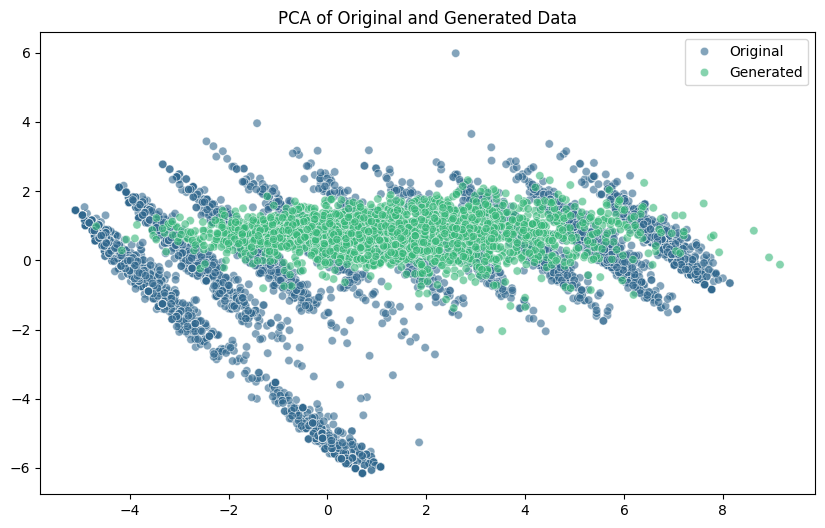

In [8]:
# data visualisations
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. combine data and create labels
combined_data = np.vstack([pre_covid.values, pre_covid_gan.values])
labels = ['Original'] * len(pre_covid) + ['Generated'] * len(pre_covid_gan)

# 2. apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)

# 3. plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette='viridis', alpha=0.6)
plt.title('PCA of Original and Generated Data')
plt.show()

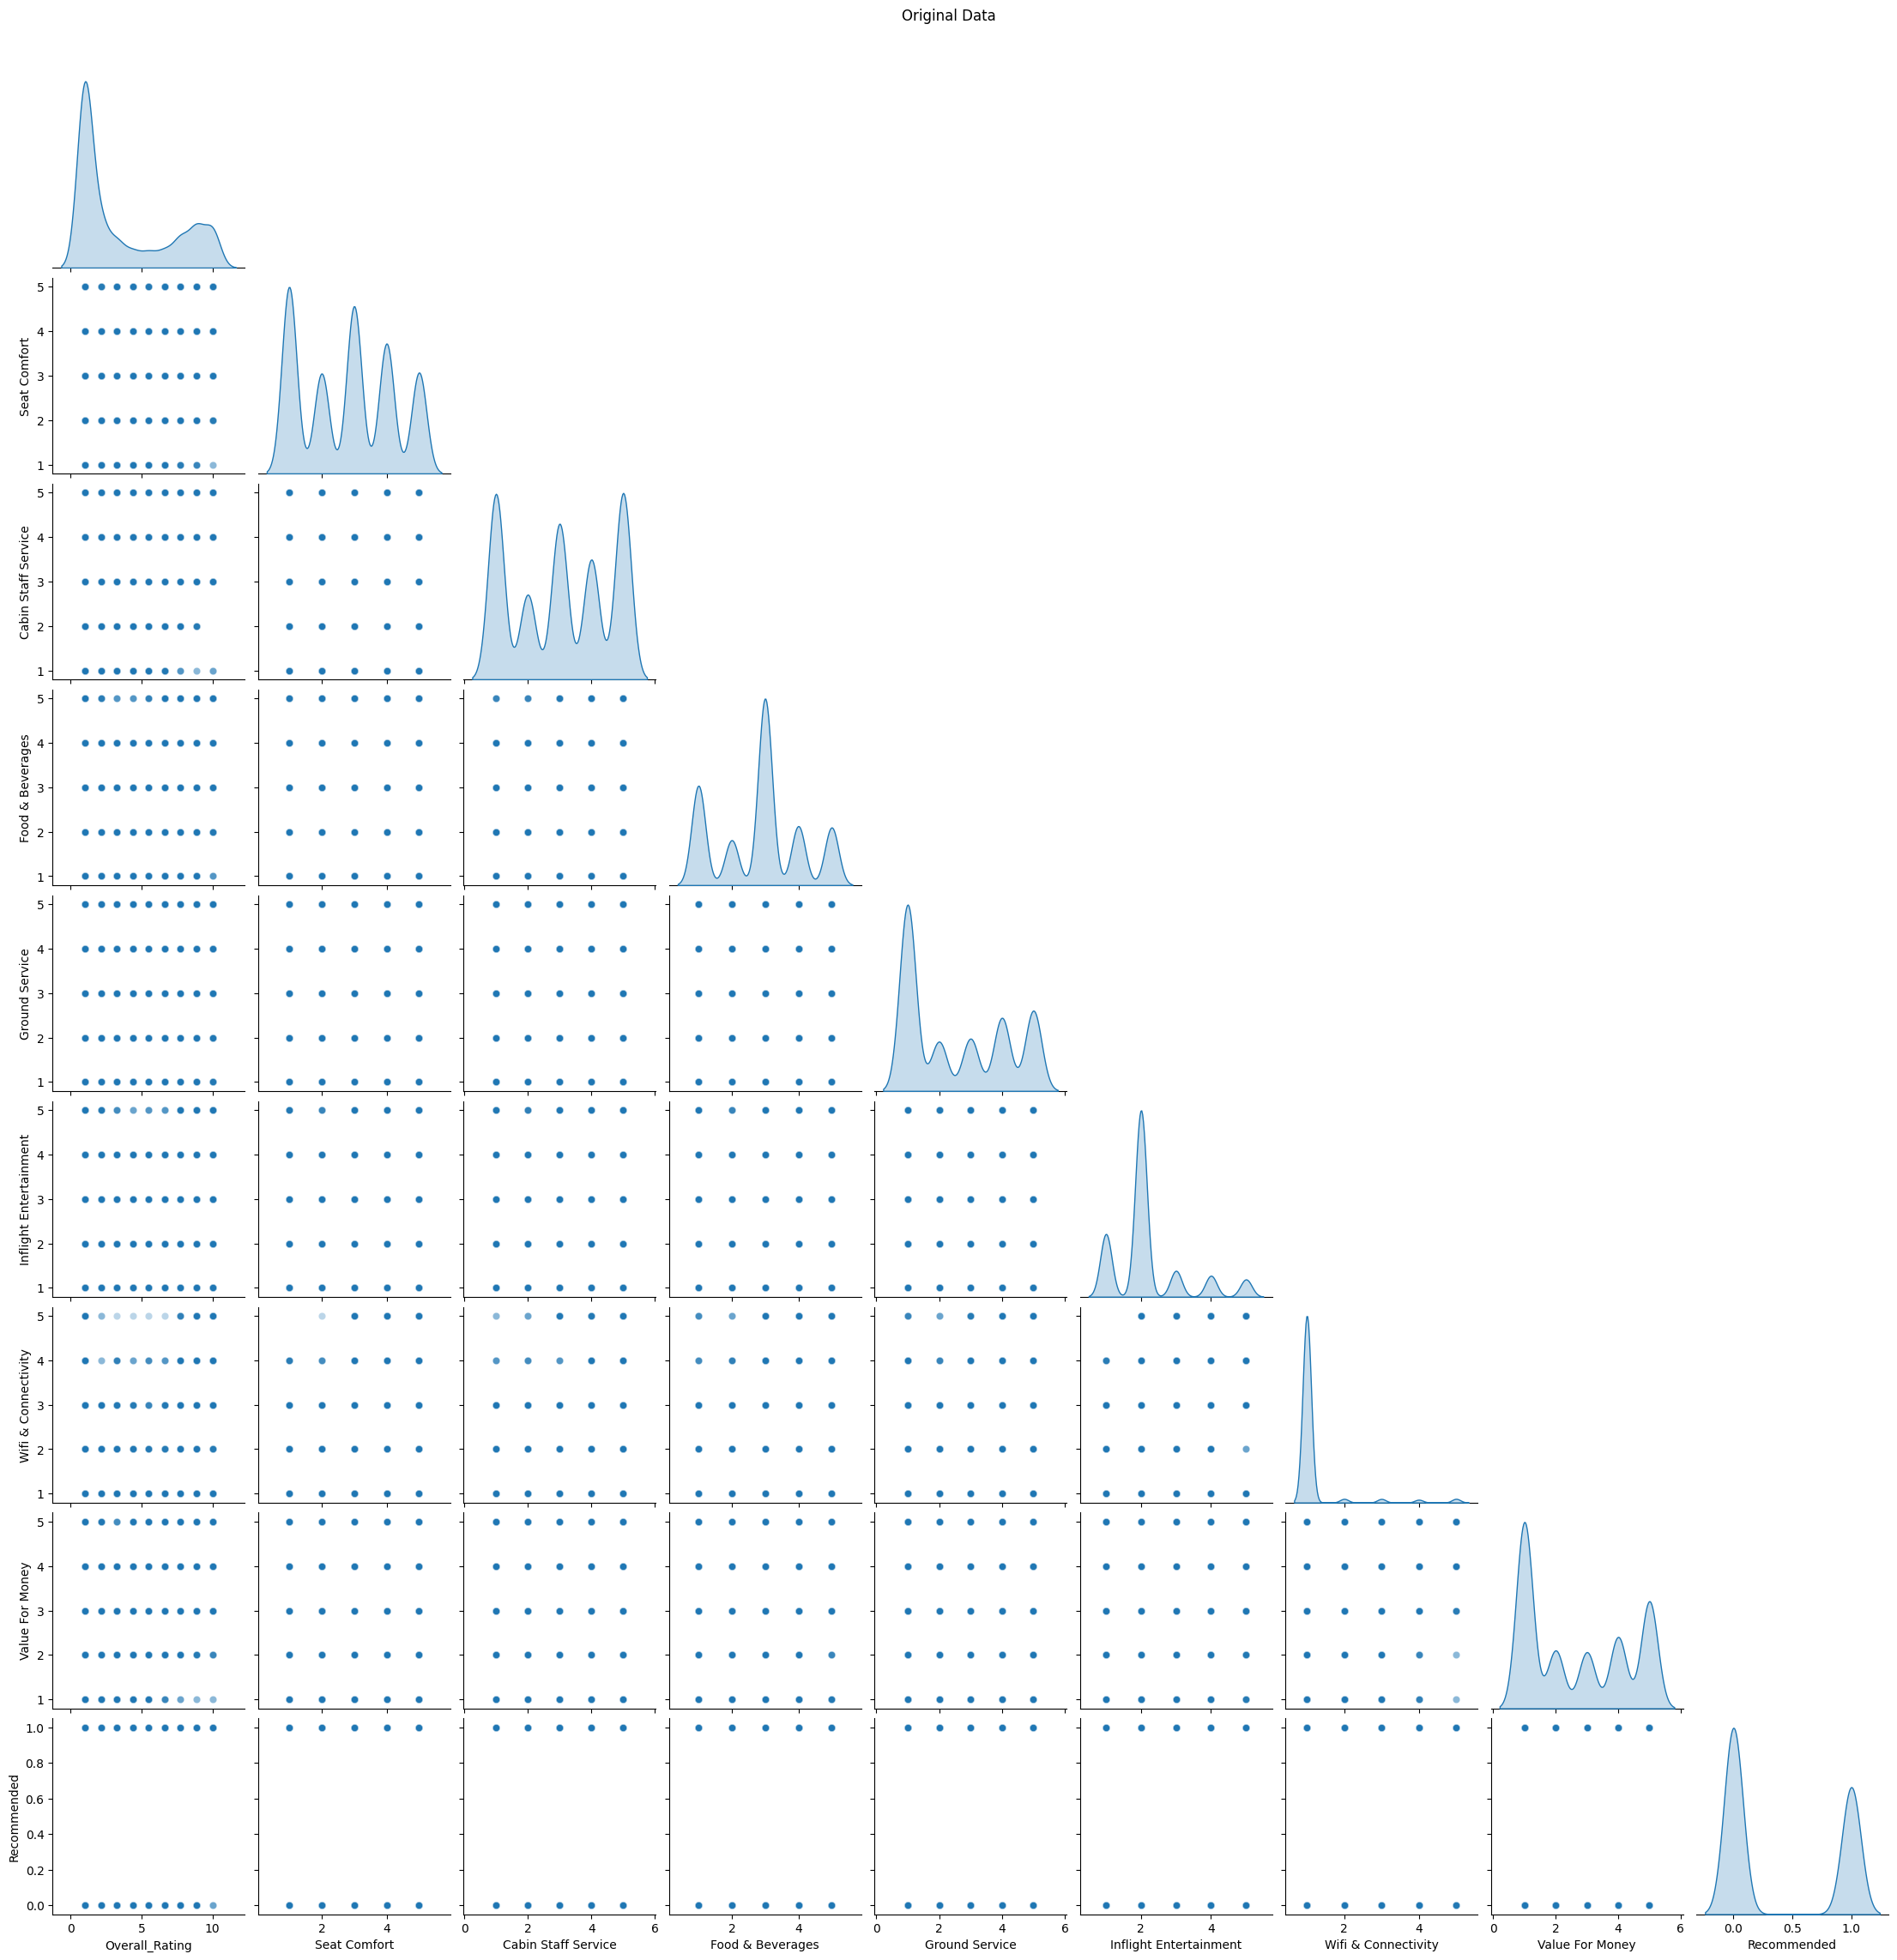

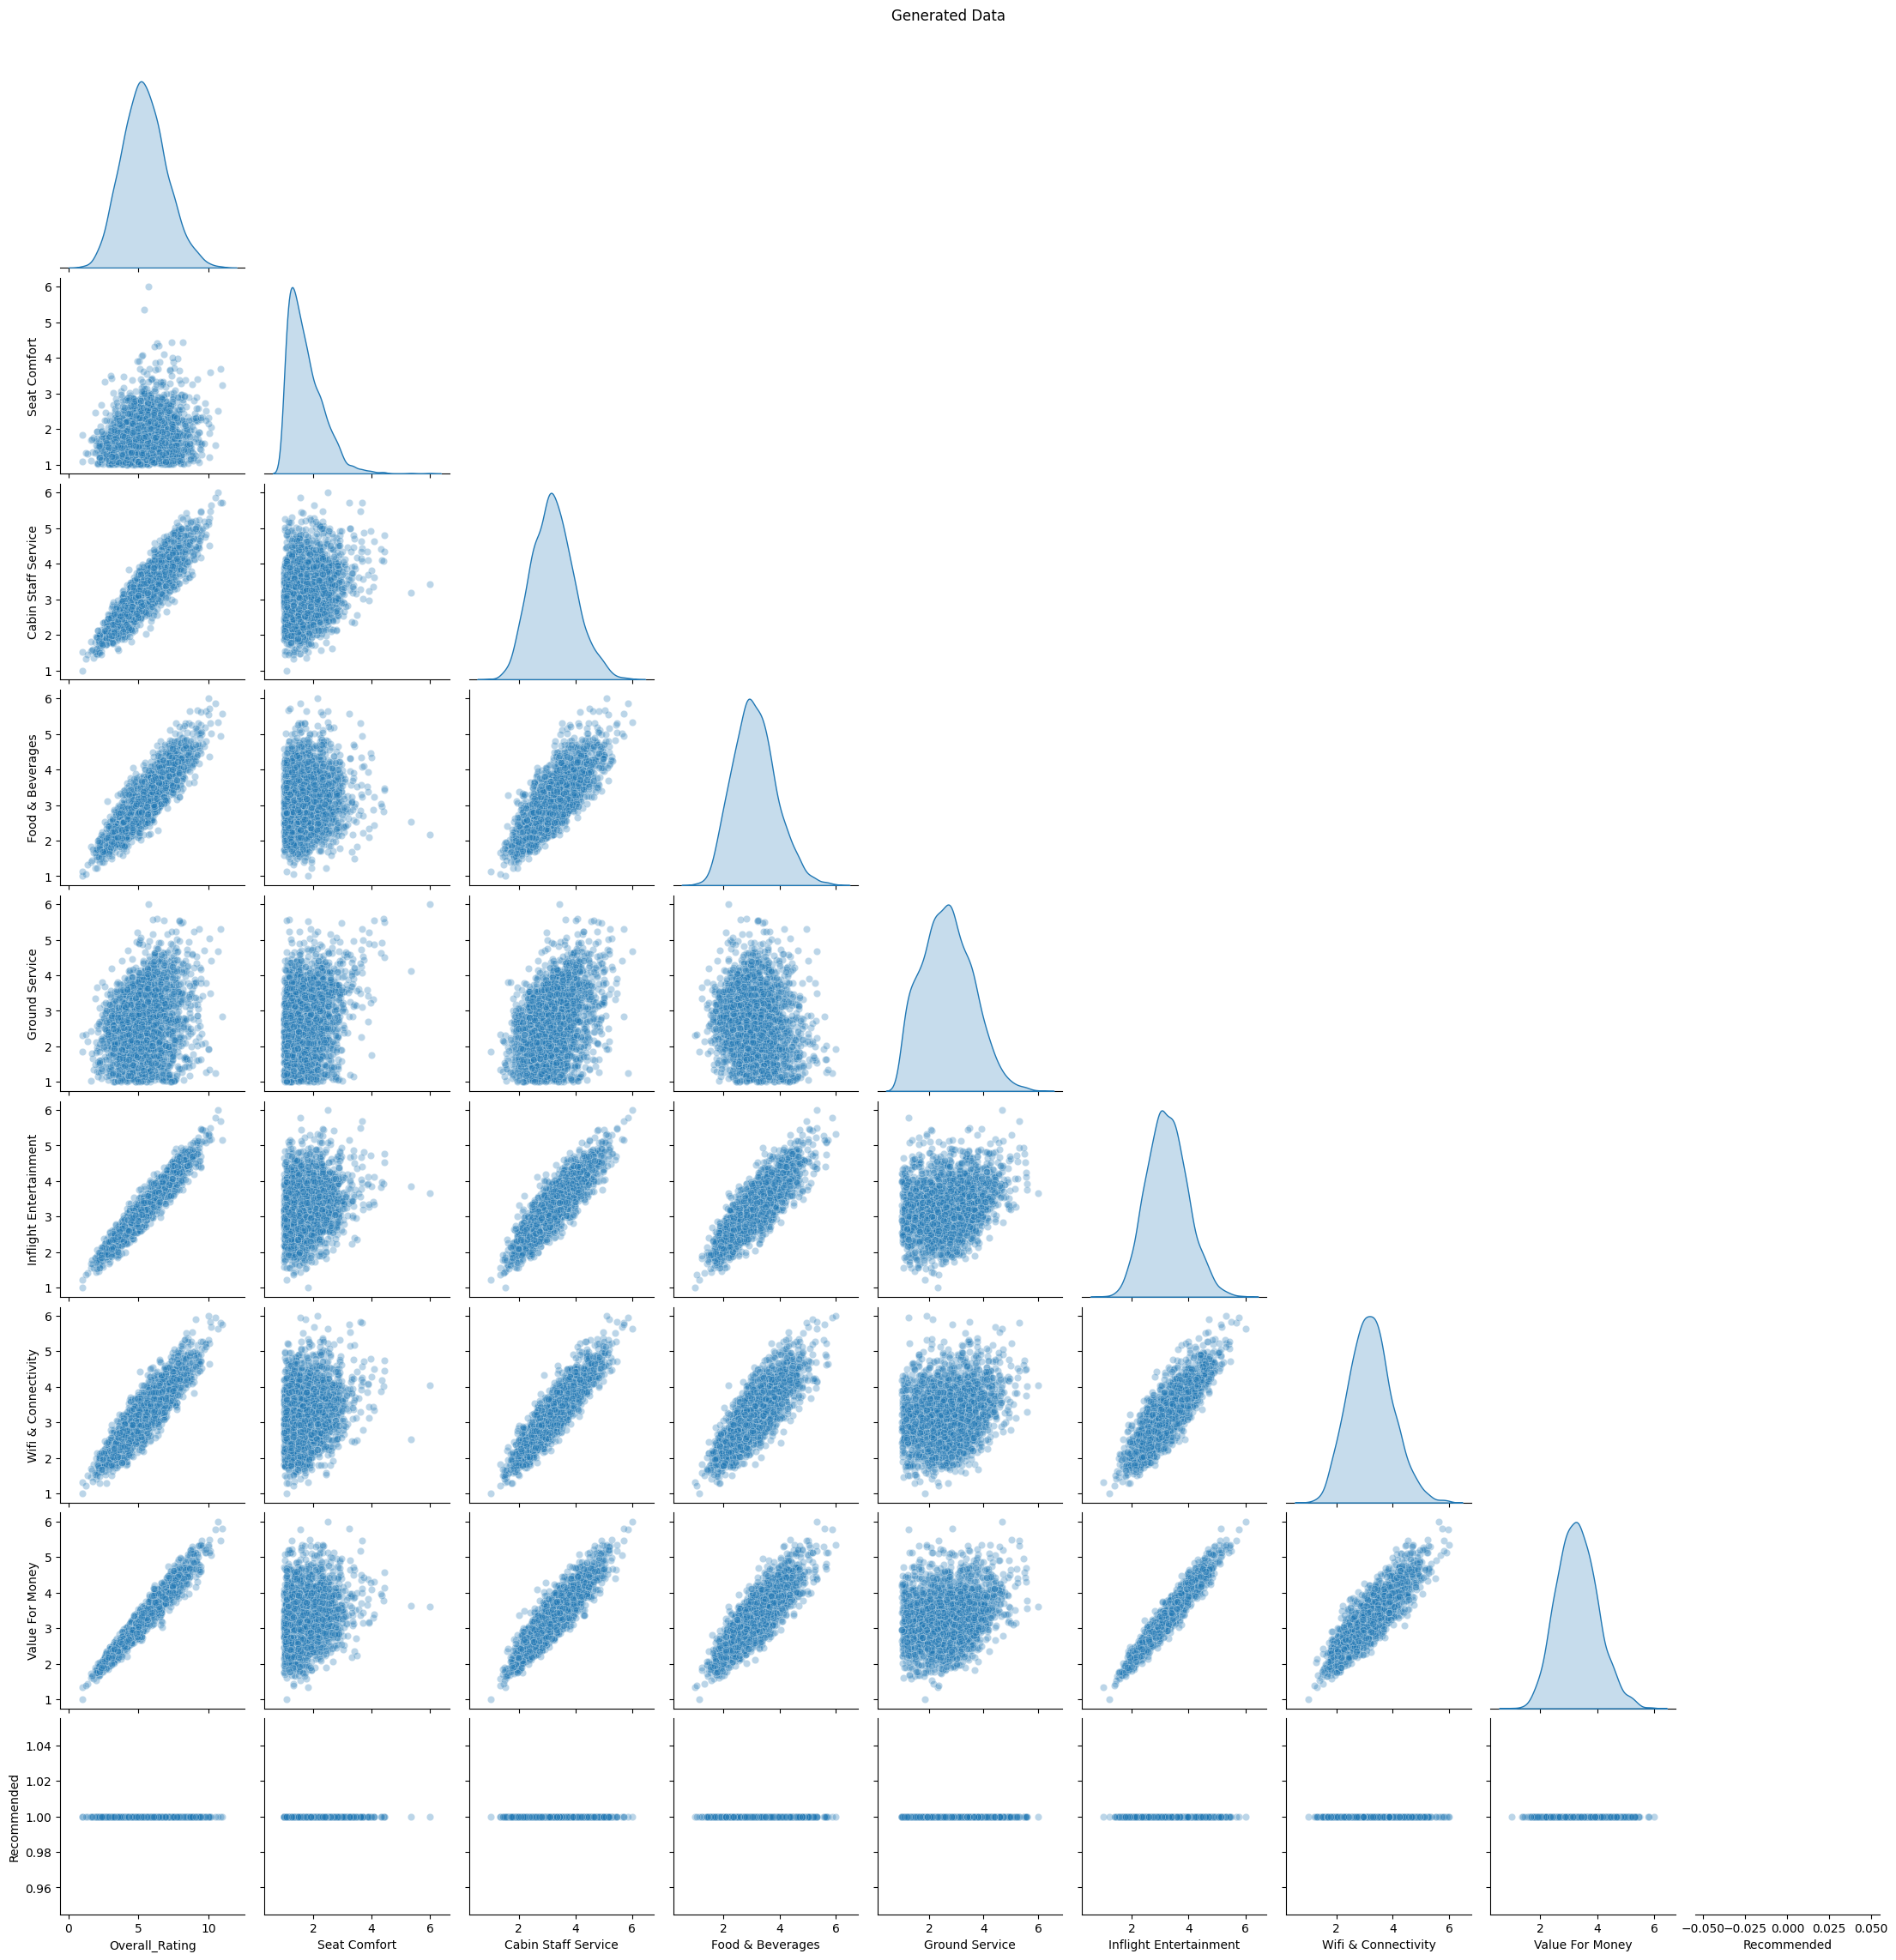

In [9]:
# feature pair plot to visualise the relationship between pairs of features -> see if generated data replicates these patterns
sns.pairplot(pre_covid, corner=True, plot_kws={'alpha':0.3}, diag_kind='kde')
plt.suptitle("Original Data", y=1.02)

sns.pairplot(pre_covid_gan, corner=True, plot_kws={'alpha':0.3}, diag_kind='kde')
plt.suptitle("Generated Data", y=1.02)

plt.show()